### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## As very big data so limiting display to 100
pd.options.display.max_columns = None
pd.set_option("display.max_rows", 500)

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score

In [2]:
# read data
churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# looking at data
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# shape of data
churn_data.shape

(99999, 226)

#### Data contains 99999 rows (customers) & 226 columns (features)

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### we can see 179 float type, 35 int type & 12 object type columns available

In [7]:
#storing columns names in a list
column_names=churn_data.columns
for col in column_names:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

In [8]:
# as per data dictonary for most of month wise feature 6,7,8,9 is available at the last of feature name (although same feature has month name)
# we will extract column names with 6,7,8,9 in the end.
month_6_data=[]
month_7_data=[]
month_8_data=[]
month_9_data=[]

In [9]:
# 6th Month data
for col in column_names:
    if col[-1]=='6':
        month_6_data.append(col)
        

In [10]:
print(month_6_data)
print(len(month_6_data))


['last_date_of_month_6', 'arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6']
54


#### We have total 54 columns with 6 at back

In [11]:
for col in column_names:
    if col[-1]=='7':
        month_7_data.append(col)

In [12]:
print(month_7_data)
print(len(month_7_data))

['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7', 'date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'fb_user_7']
54


#### We have total 54 columns with 7 at back

In [13]:
for col in column_names:
    if col[-1]=='8':
        month_8_data.append(col)

In [14]:
print(month_8_data)
print(len(month_8_data))

['last_date_of_month_8', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8']
54


#### We have total 54 columns with 8 at back

In [15]:
for col in column_names:
    if col[-1]=='9':
        month_9_data.append(col)

In [16]:
print(month_9_data)
print(len(month_9_data))

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']
54


#### We have total 54 columns with 9 at back

In [17]:
#### We can see from all column names that aug_vbc_3g, jul_vbc_3g, jun_vbc_3g, sep_vbc_3g is also monthly data where in plae of 6,7,8,9 direct month name is avalable
#### so we will add them to respective month data 

In [18]:
month_6_data.append('jun_vbc_3g')

In [19]:
month_7_data.append('jul_vbc_3g')

In [20]:
month_8_data.append('aug_vbc_3g')

In [21]:
month_9_data.append('sep_vbc_3g')

In [22]:
print((len(month_6_data)))
print((len(month_7_data)))
print((len(month_8_data)))
print((len(month_9_data)))

55
55
55
55


#### other columns are - mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, aon
#### where mobile_number is the id only, which may not be useful for our problem solving

In [23]:
# Checking null values
print(churn_data.isnull().sum()*100/churn_data.shape[0])

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [24]:
# checking shape now
churn_data.shape

(99999, 226)

In [25]:
# Again checking null %
print(churn_data.isnull().sum()*100/churn_data.shape[0])

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [26]:
# Now we will drop mobile number column as it will be of no use further
churn_data.drop('mobile_number', axis=1, inplace = True)

#### Now we have to take decision what is total recharage amount deciding criteria ?
#### One column available with total recharge amount & other column available with average data recharge amount
#### Case 1 - total recharge contains data recharge amount as well
#### Case 2 - we have to calculate data racharge amount then same need to add to total recharge amount to get monthly total rechareg of each customers
#### For taking decision we will check average data recharge amount is greater than total recharge amount column for any of customer if yes that means case 2 is valid i.e. we have to add data reacharge amount in total recharge amount

In [27]:
# checking for 6th month if av_rech_amt_data_6 > total_rech_amt_6 for any row
churn_data[churn_data['av_rech_amt_data_6']>churn_data['total_rech_amt_6']]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
161,109,0.0,0.0,0.0,6/30/2014,7/31/2014,NaN,NaN,52.288,37.849,0.000,0.000,8.23,18.24,NaN,NaN,7.58,1.53,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,8.23,18.24,NaN,NaN,7.16,1.53,NaN,NaN,0.41,0.00,NaN,NaN,0.00,0.00,NaN,NaN,15.81,19.78,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.00,NaN,NaN,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.0,NaN,NaN,15.81,19.78,0.00,0.00,8.78,17.49,NaN,NaN,13.28,33.44,NaN,NaN,10.79,8.28,NaN,NaN,32.86,59.23,NaN,NaN,0.00,0.00,NaN,NaN,7.36,0.76,NaN,NaN,0.00,5.41,NaN,NaN,0.0,0.0,NaN,NaN,7.36,6.18,NaN,NaN,40.63,65.71,0.00,0.00,0.18,0.15,NaN,NaN,0.0,0.0,NaN,NaN,0.21,0.15,NaN,NaN,3,6,0,0,

###### We can see that around 2694 rows are available which are having average data recharge more than total reacharge amount, this implies that we have to add data racharge amount into total reacharge amount to get actual total reacharge amount

In [28]:
# Checking missing values in av_rech_amt_data_6 & total_rech_data_6 columns
print(churn_data['av_rech_amt_data_6'].isnull().sum())
print(churn_data['total_rech_data_6'].isnull().sum())
print(churn_data[churn_data['total_rech_data_6'].isnull() & churn_data['av_rech_amt_data_6'].isnull()].shape)

74846
74846
(74846, 225)


#### from above we cann see null values in av_rech_amt_data_6 & total_rech_data_6 columns are 74846 
#### we have also checked how many common missing values rows are there against these columns (thru & condition) it is giving same number 74846 rows only
#### this implies that missing data is there in both columns which implies that may be cutomer has not done any recharge for data, so we can easily impute 0 for these columns

In [29]:
# Checking missing values in av_rech_amt_data_7 & total_rech_data_7 columns
print(churn_data['av_rech_amt_data_7'].isnull().sum())
print(churn_data['total_rech_data_7'].isnull().sum())
print(churn_data[churn_data['total_rech_data_7'].isnull() & churn_data['av_rech_amt_data_7'].isnull()].shape)

74428
74428
(74428, 225)


In [30]:
# Checking missing values in av_rech_amt_data_7 & total_rech_data_7 columns
print(churn_data['av_rech_amt_data_8'].isnull().sum())
print(churn_data['total_rech_data_8'].isnull().sum())
print(churn_data[churn_data['total_rech_data_8'].isnull() & churn_data['av_rech_amt_data_8'].isnull()].shape)

73660
73660
(73660, 225)


In [31]:
# Checking missing values in av_rech_amt_data_7 & total_rech_data_7 columns
print(churn_data['av_rech_amt_data_9'].isnull().sum())
print(churn_data['total_rech_data_9'].isnull().sum())
print(churn_data[churn_data['total_rech_data_9'].isnull() & churn_data['av_rech_amt_data_9'].isnull()].shape)

74077
74077
(74077, 225)


#### By above analysis it is clear that we can impute 0 for missing values for all months for av_rech_amt_data_ & total_rech_data_ columns

In [32]:
# imputing 0
churn_data['total_rech_data_6']= churn_data['total_rech_data_6'].fillna(0)
churn_data['av_rech_amt_data_6']=churn_data['av_rech_amt_data_6'].fillna(0)
churn_data['total_rech_data_7']= churn_data['total_rech_data_7'].fillna(0)
churn_data['av_rech_amt_data_7']=churn_data['av_rech_amt_data_7'].fillna(0)
churn_data['total_rech_data_8']= churn_data['total_rech_data_8'].fillna(0)
churn_data['av_rech_amt_data_8']=churn_data['av_rech_amt_data_8'].fillna(0)
churn_data['total_rech_data_9']= churn_data['total_rech_data_9'].fillna(0)
churn_data['av_rech_amt_data_9']=churn_data['av_rech_amt_data_9'].fillna(0)

In [33]:
# checking missing values
print(churn_data['av_rech_amt_data_6'].isnull().sum())
print(churn_data['total_rech_data_6'].isnull().sum())
print(churn_data[churn_data['total_rech_data_6'].isnull() & churn_data['av_rech_amt_data_6'].isnull()].shape)
print(churn_data['av_rech_amt_data_7'].isnull().sum())
print(churn_data['total_rech_data_7'].isnull().sum())
print(churn_data[churn_data['total_rech_data_7'].isnull() & churn_data['av_rech_amt_data_7'].isnull()].shape)
print(churn_data['av_rech_amt_data_8'].isnull().sum())
print(churn_data['total_rech_data_8'].isnull().sum())
print(churn_data[churn_data['total_rech_data_9'].isnull() & churn_data['av_rech_amt_data_8'].isnull()].shape)
print(churn_data['av_rech_amt_data_9'].isnull().sum())
print(churn_data['total_rech_data_9'].isnull().sum())
print(churn_data[churn_data['total_rech_data_9'].isnull() & churn_data['av_rech_amt_data_9'].isnull()].shape)

0
0
(0, 225)
0
0
(0, 225)
0
0
(0, 225)
0
0
(0, 225)


In [34]:
# we will calculate total data racharge amount for each month
churn_data['total_rech_data_amt_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_rech_data_amt_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_rech_data_amt_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']
churn_data['total_rech_data_amt_9'] = churn_data['av_rech_amt_data_9'] * churn_data['total_rech_data_9']

In [35]:
# we will calculate actual total recharge amount for each customer
churn_data['Act_total_rech_amt_6']=churn_data['total_rech_amt_6']+churn_data['total_rech_data_amt_6']
churn_data['Act_total_rech_amt_7']=churn_data['total_rech_amt_7']+churn_data['total_rech_data_amt_7']
churn_data['Act_total_rech_amt_8']=churn_data['total_rech_amt_8']+churn_data['total_rech_data_amt_8']
churn_data['Act_total_rech_amt_9']=churn_data['total_rech_amt_9']+churn_data['total_rech_data_amt_9']

## Finding high value customers
### As company want to focus on high value customers we have to find the same & further analysis will be done on those customers only.
#### High value customers are customers which are having total avg racharge values for good month (6th & 7th month) above 70 percentile of among all customers

In [36]:
# we will creare column Act_total_avg_rech_amt_6-7 in which average of 6 & 7 month total actual reacharge values will come
churn_data['Act_total_avg_rech_amt_6-7']=(churn_data['Act_total_rech_amt_6'] + churn_data['Act_total_rech_amt_7'])/2

In [37]:
# we will find out 70th percentile for Act_total_avg_rech_amt_6-7 column as this value will be used as threshold for finding high value customers
percentile_70= np.percentile(churn_data['Act_total_avg_rech_amt_6-7'], 70.0)
print(percentile_70)

478.0


### Filtering our data into high value customer data

In [38]:
# Filtering data
churn_data_HV = churn_data[churn_data['Act_total_avg_rech_amt_6-7']>=percentile_70]

In [39]:
#checking shapre of filter data
churn_data_HV.shape

(30001, 234)

#### Now we are having around 30,000 customers data

In [40]:
# checking missing values
(churn_data_HV.isnull().sum()/len(churn_data_HV)*100).sort_values(ascending = False)

fb_user_9                     49.268358
count_rech_2g_9               49.268358
max_rech_data_9               49.268358
night_pck_user_9              49.268358
arpu_3g_9                     49.268358
date_of_last_rech_data_9      49.268358
arpu_2g_9                     49.268358
count_rech_3g_9               49.268358
max_rech_data_8               46.825106
count_rech_2g_8               46.825106
night_pck_user_8              46.825106
date_of_last_rech_data_8      46.825106
fb_user_8                     46.825106
count_rech_3g_8               46.825106
arpu_2g_8                     46.825106
arpu_3g_8                     46.825106
night_pck_user_6              44.148528
fb_user_6                     44.148528
count_rech_3g_6               44.148528
arpu_2g_6                     44.148528
max_rech_data_6               44.148528
date_of_last_rech_data_6      44.148528
arpu_3g_6                     44.148528
count_rech_2g_6               44.148528
date_of_last_rech_data_7      43.145228


## Churn Customer Tag Generation
### As per problem statement we have to use 9th Data [total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9] for tag generation
#### if all above said columns are having zero value then customer has churned

In [41]:
# Generating churn column with initial value 0 for all column
churn_data_HV['Churn']=0

In [42]:
# checking null values in churn defining columns
print(churn_data_HV['total_ic_mou_9'].isnull().sum())
print(churn_data_HV['total_og_mou_9'].isnull().sum())
print(churn_data_HV['vol_2g_mb_9'].isnull().sum())
print(churn_data_HV['vol_3g_mb_9'].isnull().sum())

0
0
0
0


In [43]:
# deriving new columns for 9th month usage for customers as per problem statement
churn_data_HV['total_usg_9'] = churn_data_HV['total_ic_mou_9'] + churn_data_HV['total_og_mou_9'] + churn_data_HV['vol_2g_mb_9'] + churn_data_HV['vol_3g_mb_9']

In [44]:
# Finding total usage for 9th Month
churn_data_HV['total_usg_9'] = churn_data_HV['total_usg_9'].apply(lambda x: 1 if x ==0 else 0)
churn_data_HV['Churn'] = churn_data_HV['total_usg_9']

In [45]:
# again we will prepare 9th month usage for customers as per problem statement
churn_data_HV['total_usg_9'] = churn_data_HV['total_ic_mou_9'] + churn_data_HV['total_og_mou_9'] + churn_data_HV['vol_2g_mb_9'] + churn_data_HV['vol_3g_mb_9']

In [46]:
# checking % of churn customers in 9th Month
churn_data_HV['Churn'].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: Churn, dtype: float64

#### We can see 8.14% customers will churn in 9th Month

#### Now can delete 9th Month data as it will be of no use further for model preparation

In [47]:
# Chekcing data frame shape
churn_data_HV.shape

(30001, 236)

In [48]:
# Deletion of 9th Month data
churn_data_HV.drop(month_9_data, axis=1, inplace=True)

In [49]:
# Checking data frame shape
churn_data_HV.shape

(30001, 181)

In [50]:
print(churn_data_HV.isnull().sum()*100/churn_data_HV.shape[0])

circle_id                      0.000000
loc_og_t2o_mou                 0.746642
std_og_t2o_mou                 0.746642
loc_ic_t2o_mou                 0.746642
last_date_of_month_6           0.000000
last_date_of_month_7           0.089997
last_date_of_month_8           0.549982
arpu_6                         0.000000
arpu_7                         0.000000
arpu_8                         0.000000
onnet_mou_6                    1.816606
onnet_mou_7                    1.789940
onnet_mou_8                    3.913203
offnet_mou_6                   1.816606
offnet_mou_7                   1.789940
offnet_mou_8                   3.913203
roam_ic_mou_6                  1.816606
roam_ic_mou_7                  1.789940
roam_ic_mou_8                  3.913203
roam_og_mou_6                  1.816606
roam_og_mou_7                  1.789940
roam_og_mou_8                  3.913203
loc_og_t2t_mou_6               1.816606
loc_og_t2t_mou_7               1.789940
loc_og_t2t_mou_8               3.913203


In [51]:
### as we know date related columns are of no use as we are not doing time series analysis here, so we will drop them
Date_Col=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
          'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
          'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
churn_data_HV.drop(Date_Col, axis=1, inplace = True)

In [52]:
# checking shape of datafram
churn_data_HV.shape

(30001, 172)

In [53]:
# checking circle_id values
churn_data_HV['circle_id'].value_counts()

109    30001
Name: circle_id, dtype: int64

In [54]:
#### As this circle Id is unique 30001 values i.e. same as rows we can delete it
churn_data_HV.drop(['circle_id'], axis=1, inplace = True)

In [55]:
# checking shape of datafram
churn_data_HV.shape

(30001, 171)

In [56]:
# checking single value columns as they will be of no use in this problem
for col in churn_data_HV.columns:
    if churn_data_HV[col].nunique() == 1:
        print(col)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [57]:
# rechecking values in these columns to be sure befoer dropping them
print(churn_data_HV.loc_og_t2o_mou.value_counts())
print(churn_data_HV.std_og_t2o_mou.value_counts())
print(churn_data_HV.loc_ic_t2o_mou.value_counts())
print(churn_data_HV.std_og_t2c_mou_6.value_counts())
print(churn_data_HV.std_og_t2c_mou_7.value_counts())
print(churn_data_HV.std_og_t2c_mou_8.value_counts())
print(churn_data_HV.std_ic_t2o_mou_6.value_counts())
print(churn_data_HV.std_ic_t2o_mou_7.value_counts())
print(churn_data_HV.std_ic_t2o_mou_8.value_counts())

0.0    29777
Name: loc_og_t2o_mou, dtype: int64
0.0    29777
Name: std_og_t2o_mou, dtype: int64
0.0    29777
Name: loc_ic_t2o_mou, dtype: int64
0.0    29456
Name: std_og_t2c_mou_6, dtype: int64
0.0    29464
Name: std_og_t2c_mou_7, dtype: int64
0.0    28827
Name: std_og_t2c_mou_8, dtype: int64
0.0    29456
Name: std_ic_t2o_mou_6, dtype: int64
0.0    29464
Name: std_ic_t2o_mou_7, dtype: int64
0.0    28827
Name: std_ic_t2o_mou_8, dtype: int64


In [58]:
# dropping single value columns
churn_data_HV.drop(['loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8'], axis=1, inplace = True)

In [59]:
# checking shape of datafram
churn_data_HV.shape

(30001, 162)

In [60]:
# checking null values once again
print(churn_data_HV.isnull().sum()*100/churn_data_HV.shape[0])

arpu_6                         0.000000
arpu_7                         0.000000
arpu_8                         0.000000
onnet_mou_6                    1.816606
onnet_mou_7                    1.789940
onnet_mou_8                    3.913203
offnet_mou_6                   1.816606
offnet_mou_7                   1.789940
offnet_mou_8                   3.913203
roam_ic_mou_6                  1.816606
roam_ic_mou_7                  1.789940
roam_ic_mou_8                  3.913203
roam_og_mou_6                  1.816606
roam_og_mou_7                  1.789940
roam_og_mou_8                  3.913203
loc_og_t2t_mou_6               1.816606
loc_og_t2t_mou_7               1.789940
loc_og_t2t_mou_8               3.913203
loc_og_t2m_mou_6               1.816606
loc_og_t2m_mou_7               1.789940
loc_og_t2m_mou_8               3.913203
loc_og_t2f_mou_6               1.816606
loc_og_t2f_mou_7               1.789940
loc_og_t2f_mou_8               3.913203
loc_og_t2c_mou_6               1.816606


In [61]:
# analyzing fb_user_ column
print(churn_data_HV.fb_user_6.value_counts(normalize=True))
print(churn_data_HV.fb_user_7.value_counts(normalize=True))
print(churn_data_HV.fb_user_8.value_counts(normalize=True))

1.0    0.926534
0.0    0.073466
Name: fb_user_6, dtype: float64
1.0    0.921733
0.0    0.078267
Name: fb_user_7, dtype: float64
1.0    0.897198
0.0    0.102802
Name: fb_user_8, dtype: float64


#### These are categorical column with imbalance data
#### we can either delete these columns or impute with mode which will increase imbalance more, so better to drop these columns

In [62]:
# dropping these columns
churn_data_HV.drop(['fb_user_6', 'fb_user_7', 'fb_user_8'], axis=1, inplace = True)

In [63]:
# checking shape of datafram
churn_data_HV.shape

(30001, 159)

In [64]:
# analyzing night_pck_user_ column
print(churn_data_HV.night_pck_user_6.value_counts(normalize=True))
print(churn_data_HV.night_pck_user_7.value_counts(normalize=True))
print(churn_data_HV.night_pck_user_8.value_counts(normalize=True))

0.0    0.97571
1.0    0.02429
Name: night_pck_user_6, dtype: float64
0.0    0.978015
1.0    0.021985
Name: night_pck_user_7, dtype: float64
0.0    0.978625
1.0    0.021375
Name: night_pck_user_8, dtype: float64


#### These are categorical column with imbalance data
#### we can either delete these columns or impute with mode which will increase imbalance more, so better to drop these columns

In [65]:
# dropping these columns
churn_data_HV.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], axis=1, inplace = True)

In [66]:
# checking shape of datafram
churn_data_HV.shape

(30001, 156)

In [67]:
# analyzing arpu_2g_ column
print(churn_data_HV.arpu_2g_6.value_counts(normalize=True))
print(churn_data_HV.arpu_2g_7.value_counts(normalize=True))
print(churn_data_HV.arpu_2g_8.value_counts(normalize=True))

 0.00      0.223442
 212.17    0.060277
 63.96     0.022440
 122.07    0.018322
 424.34    0.015636
             ...   
 41.51     0.000060
 20.87     0.000060
-1.44      0.000060
 125.17    0.000060
 116.04    0.000060
Name: arpu_2g_6, Length: 5776, dtype: float64
0.00      0.246878
212.17    0.065545
63.96     0.020695
0.01      0.019933
424.34    0.018702
            ...   
154.67    0.000059
213.08    0.000059
54.19     0.000059
106.96    0.000059
678.85    0.000059
Name: arpu_2g_7, Length: 5420, dtype: float64
0.00      0.279446
212.17    0.067699
0.01      0.018241
424.34    0.017050
150.67    0.016423
            ...   
49.67     0.000063
92.00     0.000063
7.25      0.000063
17.50     0.000063
501.64    0.000063
Name: arpu_2g_8, Length: 4778, dtype: float64


#### These are numerical column with ~40% missing data
#### we can either delete these columns or impute with mean which will may effect the analysis as 40% is huge value, so better to drop these columns

In [68]:
# dropping these columns
churn_data_HV.drop(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], axis=1, inplace = True)

In [69]:
# checking shape of datafram
churn_data_HV.shape

(30001, 153)

In [70]:
# analyzing arpu_3g_ column
print(churn_data_HV.arpu_3g_6.value_counts(normalize=True))
print(churn_data_HV.arpu_3g_7.value_counts(normalize=True))
print(churn_data_HV.arpu_3g_8.value_counts(normalize=True))

0.00      0.365183
212.17    0.030019
63.96     0.016412
0.01      0.014920
122.07    0.012951
            ...   
20.80     0.000060
25.37     0.000060
441.19    0.000060
3.02      0.000060
35.22     0.000060
Name: arpu_3g_6, Length: 6330, dtype: float64
0.00      0.363604
212.17    0.035059
0.01      0.023451
63.96     0.015419
122.07    0.011374
            ...   
97.79     0.000059
4.38      0.000059
96.06     0.000059
227.42    0.000059
112.00    0.000059
Name: arpu_3g_7, Length: 6213, dtype: float64
0.00      0.368771
212.17    0.029838
0.01      0.023820
63.96     0.011158
212.18    0.010656
            ...   
582.22    0.000063
74.03     0.000063
168.91    0.000063
16.09     0.000063
10.70     0.000063
Name: arpu_3g_8, Length: 6010, dtype: float64


#### These are categorical column with imbalance data
#### we can either delete these columns or impute with mode which will increase imbalance more, so better to drop these columns

In [71]:
# dropping these columns
churn_data_HV.drop(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8'], axis=1, inplace = True)

In [72]:
# checking shape of datafram
churn_data_HV.shape

(30001, 150)

In [73]:
# checking null values once again
print(churn_data_HV.isnull().sum()*100/churn_data_HV.shape[0])

arpu_6                         0.000000
arpu_7                         0.000000
arpu_8                         0.000000
onnet_mou_6                    1.816606
onnet_mou_7                    1.789940
onnet_mou_8                    3.913203
offnet_mou_6                   1.816606
offnet_mou_7                   1.789940
offnet_mou_8                   3.913203
roam_ic_mou_6                  1.816606
roam_ic_mou_7                  1.789940
roam_ic_mou_8                  3.913203
roam_og_mou_6                  1.816606
roam_og_mou_7                  1.789940
roam_og_mou_8                  3.913203
loc_og_t2t_mou_6               1.816606
loc_og_t2t_mou_7               1.789940
loc_og_t2t_mou_8               3.913203
loc_og_t2m_mou_6               1.816606
loc_og_t2m_mou_7               1.789940
loc_og_t2m_mou_8               3.913203
loc_og_t2f_mou_6               1.816606
loc_og_t2f_mou_7               1.789940
loc_og_t2f_mou_8               3.913203
loc_og_t2c_mou_6               1.816606


#### other columns with >40% missing values are max_rech_data_6, max_rech_data_7, max_rech_data_8,count_rech_2g_6. count_rech_2g_7, count_rech_2g_8, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8 so we will drop them as well in place of imputting

In [74]:
# dropping these columns
churn_data_HV.drop(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'], axis=1, inplace = True)

In [75]:
# checking shape
churn_data_HV.shape

(30001, 141)

In [76]:
# checking missing values
print(churn_data_HV.isnull().sum()*100/len(churn_data_HV))

arpu_6                        0.000000
arpu_7                        0.000000
arpu_8                        0.000000
onnet_mou_6                   1.816606
onnet_mou_7                   1.789940
onnet_mou_8                   3.913203
offnet_mou_6                  1.816606
offnet_mou_7                  1.789940
offnet_mou_8                  3.913203
roam_ic_mou_6                 1.816606
roam_ic_mou_7                 1.789940
roam_ic_mou_8                 3.913203
roam_og_mou_6                 1.816606
roam_og_mou_7                 1.789940
roam_og_mou_8                 3.913203
loc_og_t2t_mou_6              1.816606
loc_og_t2t_mou_7              1.789940
loc_og_t2t_mou_8              3.913203
loc_og_t2m_mou_6              1.816606
loc_og_t2m_mou_7              1.789940
loc_og_t2m_mou_8              3.913203
loc_og_t2f_mou_6              1.816606
loc_og_t2f_mou_7              1.789940
loc_og_t2f_mou_8              3.913203
loc_og_t2c_mou_6              1.816606
loc_og_t2c_mou_7         

### As we can see now only upto 4% null values are available
#### Either we can impute these missing values or drop the rows
#### dropping rows will result in lossing some data whereas imputing may generate bisasness 
#### we will see if we drop how many rows will drop

In [77]:
churn_data_HV.dropna()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,Act_total_rech_amt_6,Act_total_rech_amt_7,Act_total_rech_amt_8,Act_total_rech_amt_9,Act_total_avg_rech_amt_6-7,Churn,total_usg_9
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,0.0,1580.0,790.0,3638.0,0.0,1185.0,1,0.00
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,0.0,437.0,955.0,327.0,186.0,696.0,0,177.09
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,3

##### we can see from 30001 rows will reduce to 28504 i.e. 5% data loss, which is somewhere ok

In [78]:
# checking how many rows will drop will remove 
churn_data_HV.dropna(inplace=True)

In [79]:
churn_data_HV.shape

(28504, 141)

In [80]:
churn_data_HV.Churn.value_counts(normalize=True)*100

0    94.400786
1     5.599214
Name: Churn, dtype: float64

In [81]:
# checking missing values
print(churn_data_HV.isnull().sum()*100/len(churn_data_HV))

arpu_6                        0.0
arpu_7                        0.0
arpu_8                        0.0
onnet_mou_6                   0.0
onnet_mou_7                   0.0
onnet_mou_8                   0.0
offnet_mou_6                  0.0
offnet_mou_7                  0.0
offnet_mou_8                  0.0
roam_ic_mou_6                 0.0
roam_ic_mou_7                 0.0
roam_ic_mou_8                 0.0
roam_og_mou_6                 0.0
roam_og_mou_7                 0.0
roam_og_mou_8                 0.0
loc_og_t2t_mou_6              0.0
loc_og_t2t_mou_7              0.0
loc_og_t2t_mou_8              0.0
loc_og_t2m_mou_6              0.0
loc_og_t2m_mou_7              0.0
loc_og_t2m_mou_8              0.0
loc_og_t2f_mou_6              0.0
loc_og_t2f_mou_7              0.0
loc_og_t2f_mou_8              0.0
loc_og_t2c_mou_6              0.0
loc_og_t2c_mou_7              0.0
loc_og_t2c_mou_8              0.0
loc_og_mou_6                  0.0
loc_og_mou_7                  0.0
loc_og_mou_8  

In [82]:
#checking shape
churn_data_HV.shape

(28504, 141)

In [83]:
# we will drop 9 month all data
churn_data_HV.drop(['Act_total_rech_amt_9', 'total_rech_data_amt_9','total_usg_9' ], axis =1, inplace = True)

In [84]:
#checking shape
churn_data_HV.shape

(28504, 138)

In [85]:
churn_data_HV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 138 entries, arpu_6 to Churn
dtypes: float64(112), int64(26)
memory usage: 30.2 MB


## EDA

In [86]:
# function for create box plotting
# we will exclude outliers by snowfliers option otehrwise graph won't be interpretable
def box_plot(feature):
    plt.figure(figsize=(15,10))
    data = churn_data_HV
    plt.subplot(2,3,1)
    sns.boxplot(data=data, y=feature+"_6",x="Churn",hue="Churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=data, y=feature+"_7",x="Churn",hue="Churn",
                showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=data, y=feature+"_8",x="Churn",hue="Churn",
                showfliers=False)
    plt.show()

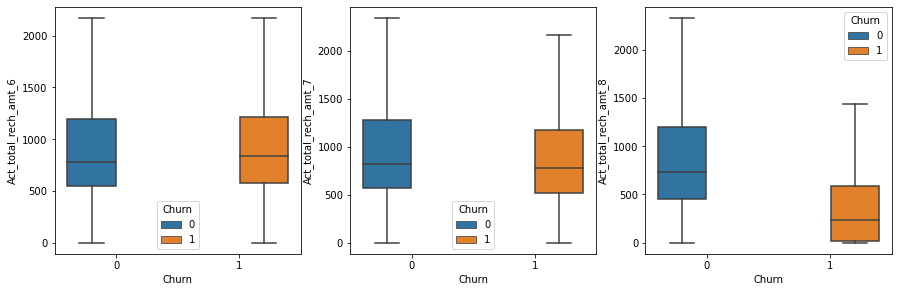

In [87]:
# box plot for act total rech amt
box_plot('Act_total_rech_amt')

#### we can clearly see that in 6th & 7th Month churn & non churn both customers are having simialr distribution for total recharge amount but in 8th month we can clearly see total recharge amount is coming down significantly

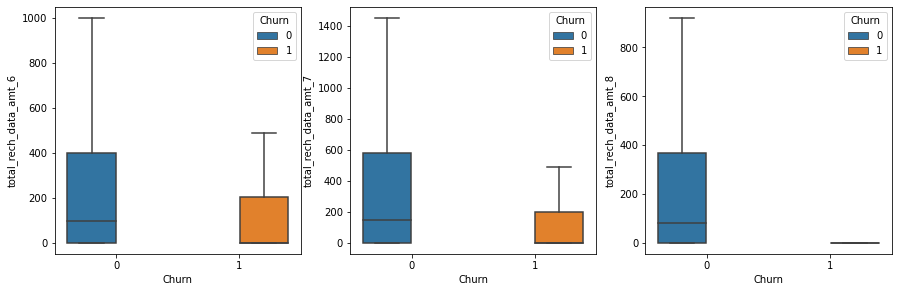

In [88]:
# box plot for total rech data amt
box_plot('total_rech_data_amt')

<AxesSubplot:xlabel='Churn', ylabel='aon'>

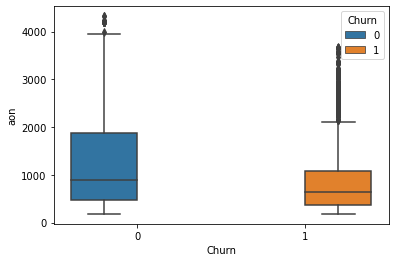

In [89]:
# box plot for aon
sns.boxplot(data=churn_data_HV, y='aon',x="Churn",hue="Churn",
                )

#### we can see that aon is more or less for churned customers

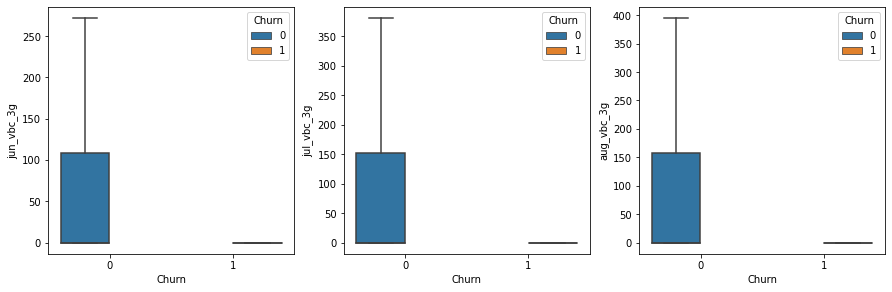

In [90]:
# box plot for vbc_3g

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=churn_data_HV, y="jun_vbc_3g",x="Churn",hue="Churn",
showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=churn_data_HV, y="jul_vbc_3g",x="Churn",hue="Churn",
showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=churn_data_HV, y="aug_vbc_3g",x="Churn",hue="Churn",
showfliers=False)
plt.show()

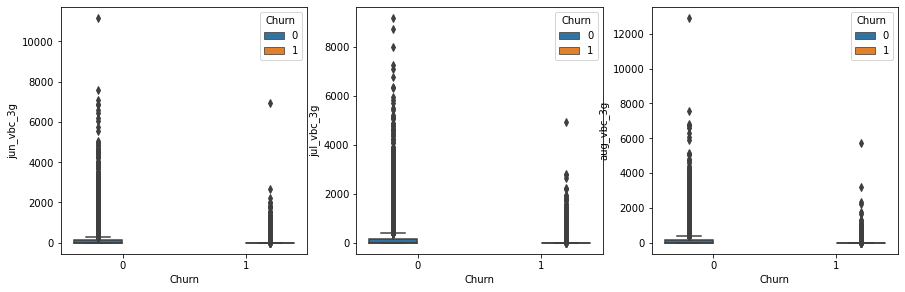

In [91]:
# box plot for vbc_3g

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=churn_data_HV, y="jun_vbc_3g",x="Churn",hue="Churn",
)
plt.subplot(2,3,2)
sns.boxplot(data=churn_data_HV, y="jul_vbc_3g",x="Churn",hue="Churn",
)
plt.subplot(2,3,3)
sns.boxplot(data=churn_data_HV, y="aug_vbc_3g",x="Churn",hue="Churn",
)
plt.show()

#### by above 2 boxplots we can see that VBC usually lesser in churn customers in all months (good pahse & bad phase)

In [92]:
# creating function for mean bar graph plotting
def meanvalue_bar_graph(data,columns):
    df1 = data[data.Churn==0].filter(columns)
    df2 = data[data.Churn==1].filter(columns)

    mean_df1 = pd.DataFrame([df1.mean()],index={'No_Churn'})
    mean_df2 = pd.DataFrame([df2.mean()],index={'Churn'})

    frames = [mean_df1, mean_df2]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    

In [93]:
# checking monthly data for 2g & 3g
Monthly_data_use=['monthly_2g_6',
'monthly_2g_7',
'monthly_2g_8',
'monthly_3g_6',
'monthly_3g_7',
'monthly_3g_8']

In [94]:
Monthly_data_use

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

<AxesSubplot:xlabel='Churn'>

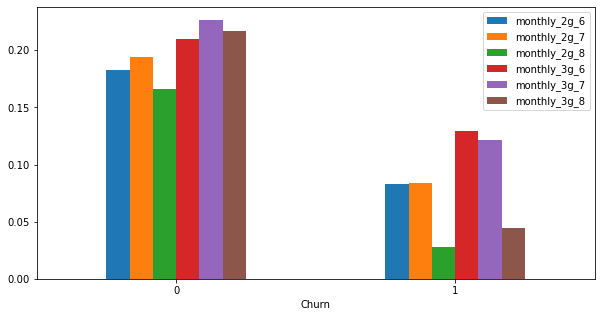

In [95]:
df=churn_data_HV.groupby(by="Churn").mean()
df[['monthly_2g_6', 'monthly_2g_7','monthly_2g_8', 'monthly_3g_6','monthly_3g_7','monthly_3g_8']].plot.bar(figsize=(10,5),rot=0)

In [96]:
def Mean_Bar_Plot (data,columns):
    df1 = data[data.Churn==0].filter(columns)
    df2 = data[data.Churn==1].filter(columns)

    mean_df1 = pd.DataFrame([df1.mean()],index={'Non Churn'})
    mean_df2 = pd.DataFrame([df2.mean()],index={'Churn'})

    frames = [mean_df1, mean_df2]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

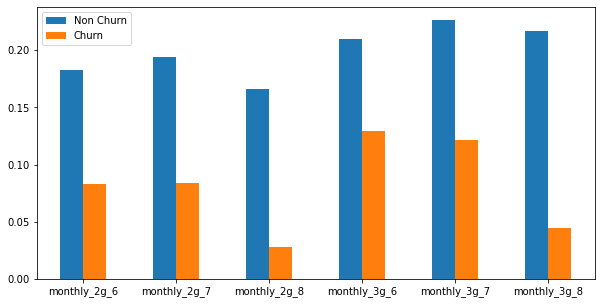

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.183105,0.193809,0.166382,0.209677,0.226513,0.216850
Churn,0.082707,0.083960,0.028195,0.129073,0.121554,0.044486


In [97]:
Mean_Bar_Plot(churn_data_HV, Monthly_data_use)

#### we can see that for 2g & 3g monthly is lesser in churned customers whereas it is further reducing for 8th month for churned customer

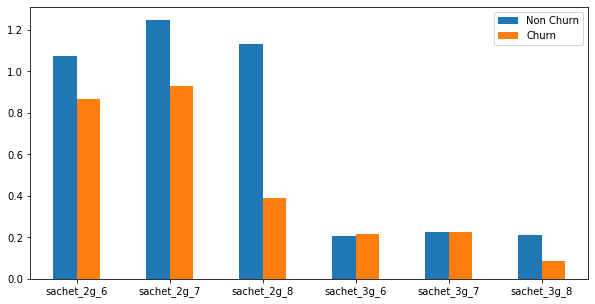

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.074625,1.247993,1.130296,0.204772,0.226587,0.213059
Churn,0.867168,0.931704,0.390351,0.214912,0.225564,0.084586


In [98]:
# sachet column analysis
Mean_Bar_Plot(churn_data_HV, ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'])

#### we can see that sachet is decreasing for 8th month in churned customer 
#### schet for 3g is very less in compare to 2g

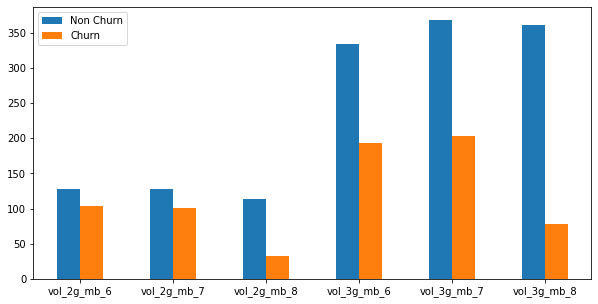

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Non Churn,128.464265,128.572613,113.295200,334.114542,368.343276,361.489500
Churn,103.577049,100.584950,32.508878,193.128421,203.092945,77.591792


In [99]:
# vol_2g & Vol_3g column analysis
Mean_Bar_Plot(churn_data_HV, ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'])

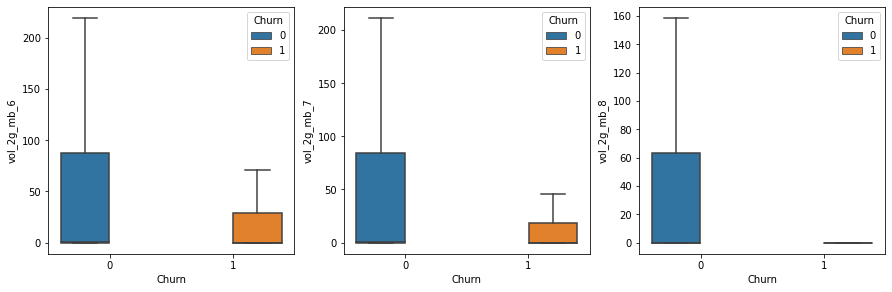

In [100]:
# vol 2g column
box_plot('vol_2g_mb')

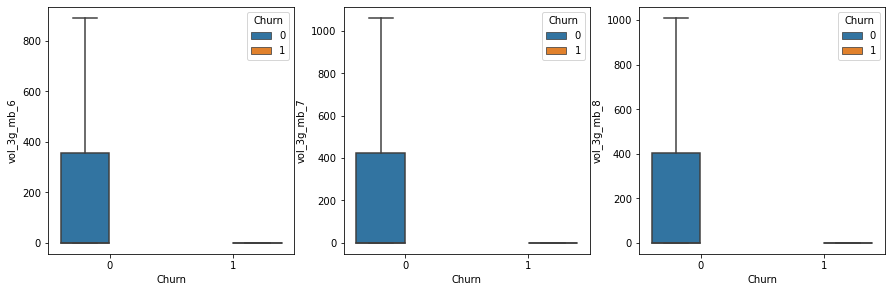

In [101]:
# vol 3g column
box_plot('vol_3g_mb')

#### by above graphs we can see that among 2g & 3g vol is more for 3g as expected
#### both 2g & 3g is decreasing from 6th to 8th month continuously for churned customer (for 8th month more decrease)

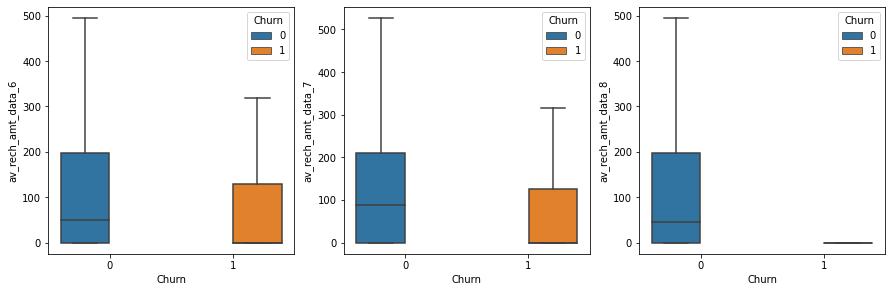

In [102]:
# av rech amt data
box_plot('av_rech_amt_data')

#### we can clearly see that av rach amt data is decreasing for 8th month for churned customers

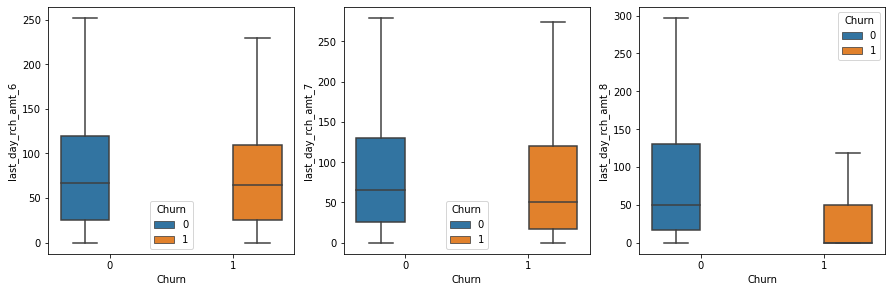

In [103]:
# last day rch amt
box_plot('last_day_rch_amt')

#### in line to other parameters we can see that last day recharge amount is lesser for churned customer for 8th month

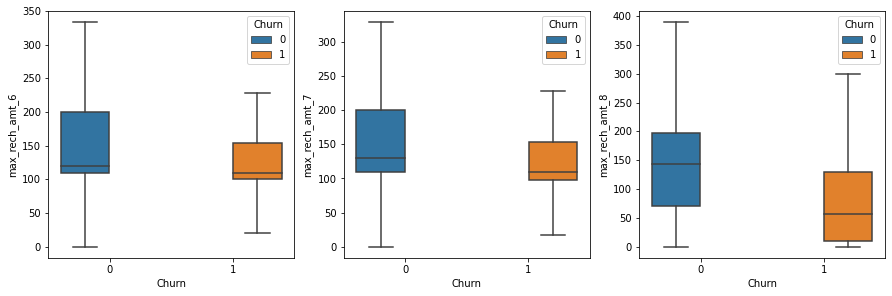

In [104]:
# max rech amt column
box_plot('max_rech_amt')

#### max rech amt coming drastically down for churned customer in 8th month although in all month it was somehow down wrt to non churn customer

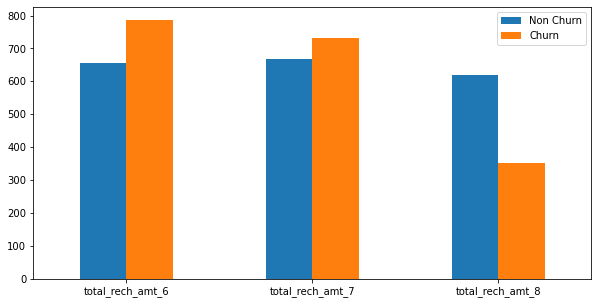

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
Non Churn,656.141854,668.535826,619.713691
Churn,786.300752,733.111529,352.988095


In [105]:
Mean_Bar_Plot(churn_data_HV, ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'])

#### for 8th month we can see that rech amt is drastically coming down for churned customer which was more in 6th & 7th Month wrt to non churned customer

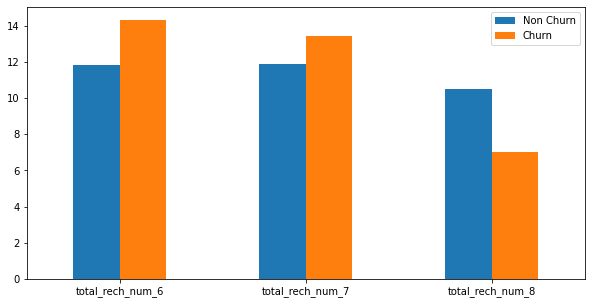

,total_rech_num_6,total_rech_num_7,total_rech_num_8
Non Churn,11.826037,11.875465,10.523562
Churn,14.317043,13.431704,7.021303


In [106]:
# total rech amt column
Mean_Bar_Plot(churn_data_HV, ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'])

#### we can see mean for rach number came down for churned customer in 8th month, although interestingly they were higher for churned customer in 6th & 7th month w.r.t. to non churned customers

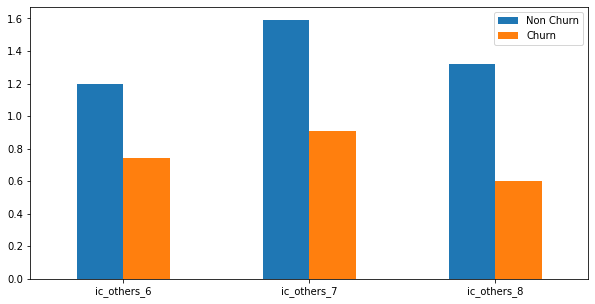

,ic_others_6,ic_others_7,ic_others_8
Non Churn,1.198523,1.590033,1.318419
Churn,0.743904,0.906598,0.603352


In [107]:
# IC to other column
Mean_Bar_Plot(churn_data_HV, ['ic_others_6', 'ic_others_7', 'ic_others_8'])

#### we can see for churned customer ic to others was always low however it came down drastically in 8th month wrt non churned customer

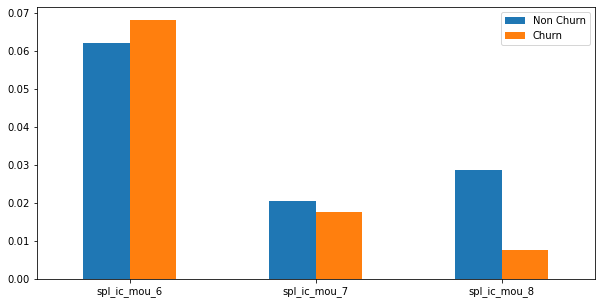

,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8
Non Churn,0.062288,0.020424,0.028826
Churn,0.068246,0.017669,0.007506


In [108]:
# Spl ic column
Mean_Bar_Plot(churn_data_HV, ['spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8'])

#### we can see that spl incoming call minutes decreasing month by month however difference b/w churned & non churned customer increased in 8th month

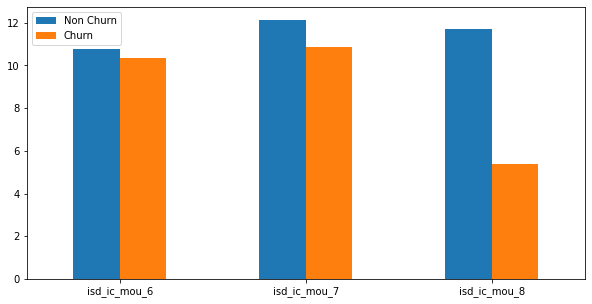

,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
Non Churn,10.780911,12.125720,11.702510
Churn,10.359160,10.873315,5.361353


In [109]:
# isd ic column
Mean_Bar_Plot(churn_data_HV, ['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8'])

#### we can see that for 8th month for churned customer isd ic usage is decreased wrt non churned customer

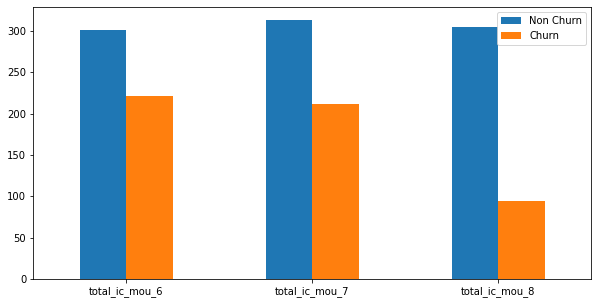

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
Non Churn,301.282562,313.187672,305.258764
Churn,221.608578,211.700602,93.965169


In [110]:
# total ic column
Mean_Bar_Plot(churn_data_HV, ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'])

#### we can incoming call was always less for churned customer (wrt non churned customer) however diff b/w incoming calls was increased in 8th Month

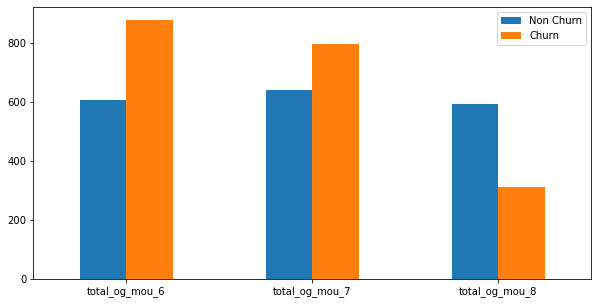

,total_og_mou_6,total_og_mou_7,total_og_mou_8
Non Churn,605.018454,639.164115,592.416682
Churn,876.536385,794.788252,310.800457


In [111]:
# total og column
Mean_Bar_Plot(churn_data_HV, ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'])

#### interestingly churned customers were havning more outgoing calls wrt non churned customer which cam down drastically in 8th month, also otugoing calls minutes are decreasing from 6th to 7th month also

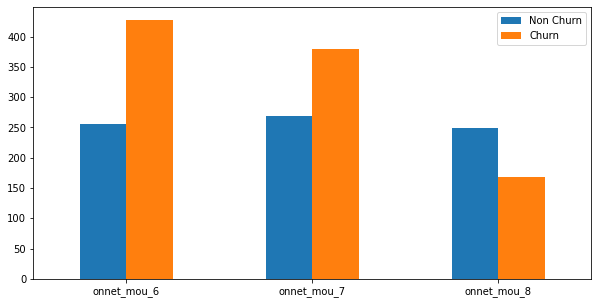

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,255.630152,269.757639,249.273280
Churn,427.437538,380.058828,168.096134


In [112]:
# onnet mou column
Mean_Bar_Plot(churn_data_HV, ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'])

#### onnet (same newtwork) minutes were also more for churned customer but same decreased wrt non churned customer in 8th month

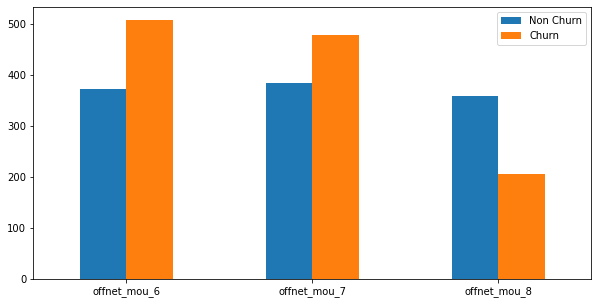

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,372.325428,384.637795,358.765815
Churn,507.348396,477.792093,206.251711


In [113]:
# offnet mou column
Mean_Bar_Plot(churn_data_HV, ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'])

#### just like onnet, offnet also following same pattern i.e. churn customers were havning more minutes but same decreased in 8th month

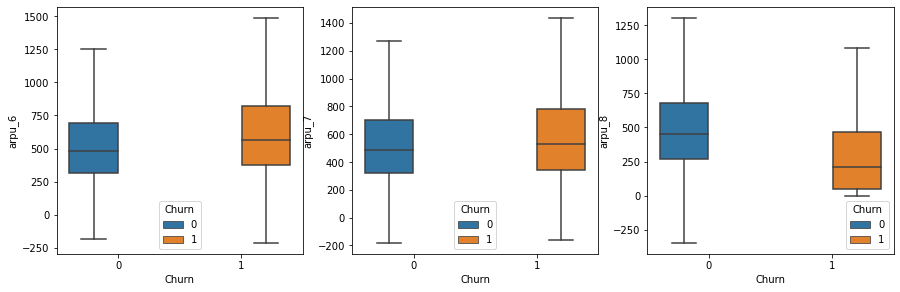

In [114]:
# arpu data
box_plot('arpu')

#### we can clearly see that arpu was more for churned customer (wrt non churned)but same came down in 8th month

In [115]:
# preparing list of minutes columns
minutes_columns = churn_data_HV.columns[churn_data_HV.columns.str.contains('mou')]
len(minutes_columns)

81

#### as number of columns are very high in this category we will further divide the data in incoming & outgoing category

In [116]:
# 6 month outgoing calls columns
Outgoing_Minutes_columns6 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_og_.*mou_6')]
len(Outgoing_Minutes_columns6)

13

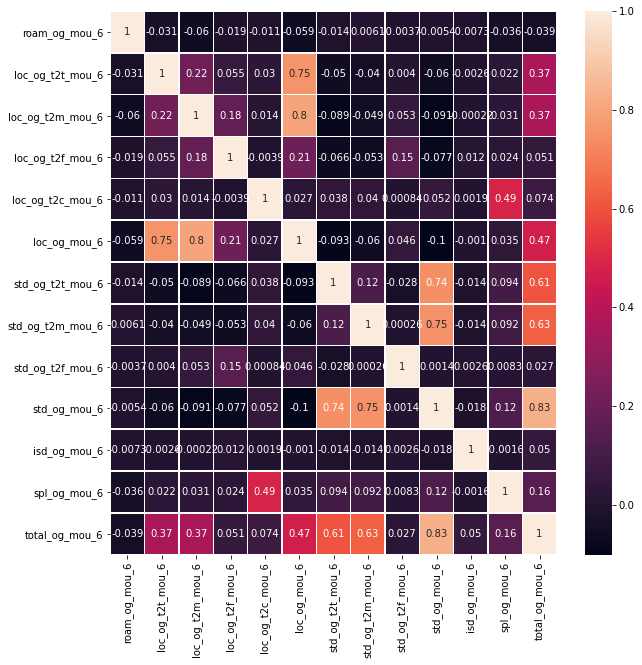

In [117]:
#heat map
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Outgoing_Minutes_columns6].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)


#### as per above heat map we can drop - 
#### total_og_mou_6,loc_og_mou_6, std_og_mou_6

In [118]:
# dropping above 3 columns
churn_data_HV.drop(['std_og_mou_6', 'total_og_mou_6', 'loc_og_mou_6'],axis=1,inplace=True)

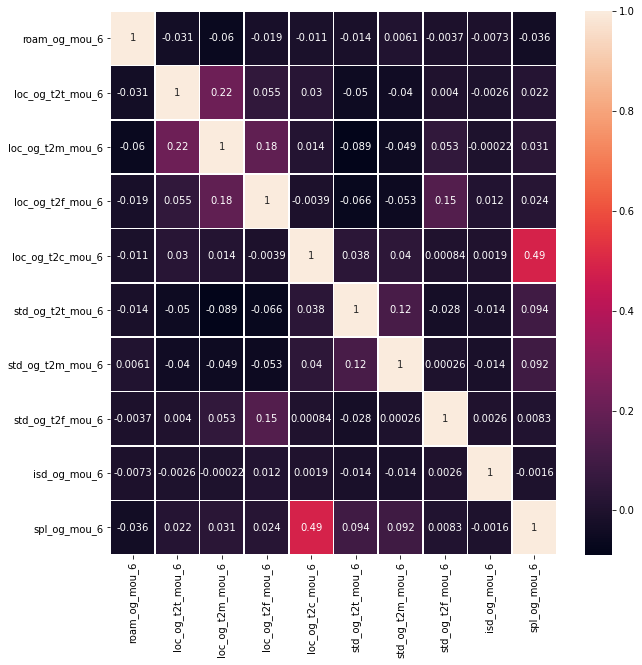

In [119]:
Outgoing_Minutes_columns6 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_og_.*mou_6')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Outgoing_Minutes_columns6].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

#### it is less correalted 

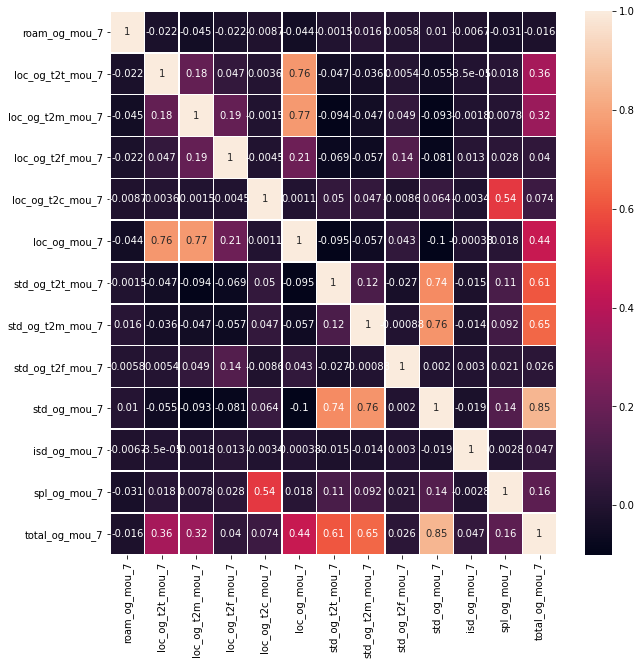

In [120]:
# 7 month outgoing calls columns
Outgoing_Minutes_columns7 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_og_.*mou_7')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Outgoing_Minutes_columns7].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

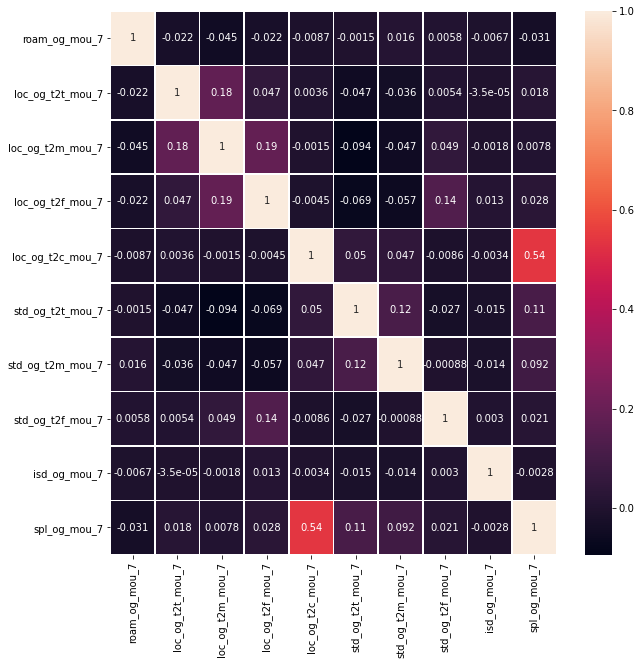

In [121]:
# dropping 3 high correlated columns
churn_data_HV.drop(['std_og_mou_7', 'total_og_mou_7', 'loc_og_mou_7'],axis=1,inplace=True)
Outgoing_Minutes_columns7 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_og_.*mou_7')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Outgoing_Minutes_columns7].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

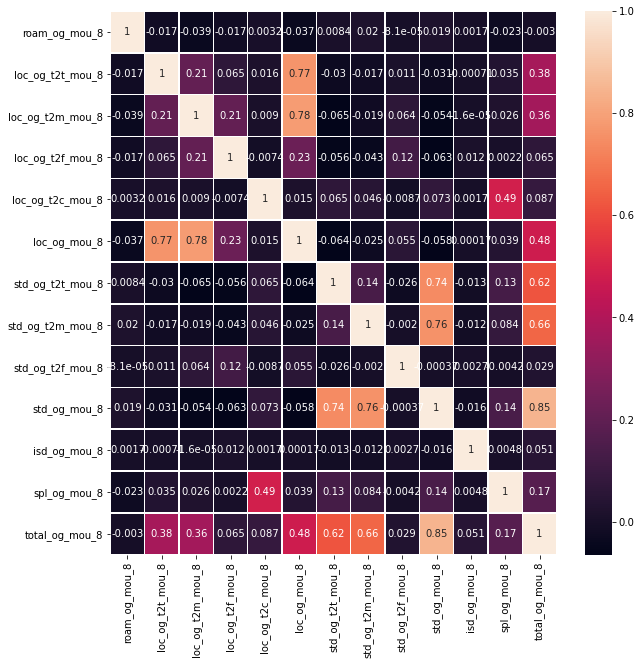

In [122]:
# 8 month outgoing calls columns
Outgoing_Minutes_columns8 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_og_.*mou_8')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Outgoing_Minutes_columns8].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

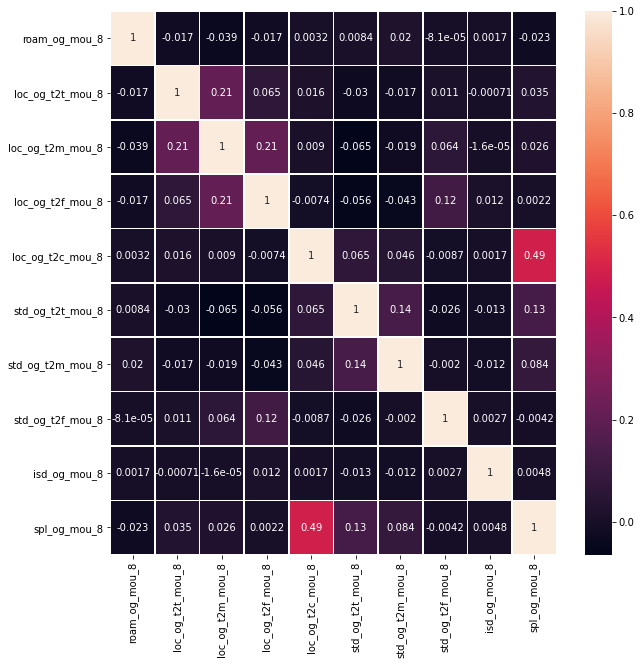

In [123]:
# dropping 3 high correlated columns
churn_data_HV.drop(['std_og_mou_8', 'total_og_mou_8', 'loc_og_mou_8'],axis=1,inplace=True)
Outgoing_Minutes_columns8 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_og_.*mou_8')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Outgoing_Minutes_columns8].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

#### now we will do same activity for incoming calls

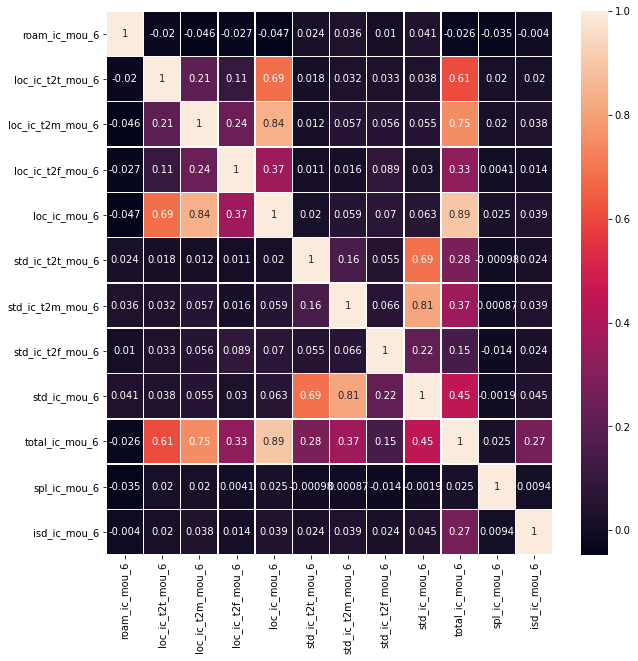

In [124]:
# for 6 month incoming call columns
Incoming_Minutes_columns6 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_ic_.*mou_6')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Incoming_Minutes_columns6].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

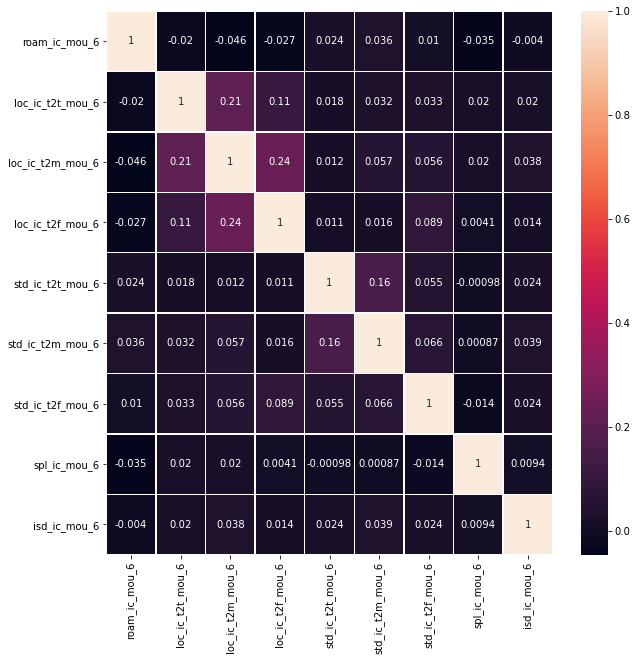

In [125]:
# dropping 3 high correlated columns - total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6
churn_data_HV.drop(['std_ic_mou_6', 'total_ic_mou_6', 'loc_ic_mou_6'],axis=1,inplace=True)
Incoming_Minutes_columns6 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_ic_.*mou_6')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Incoming_Minutes_columns6].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

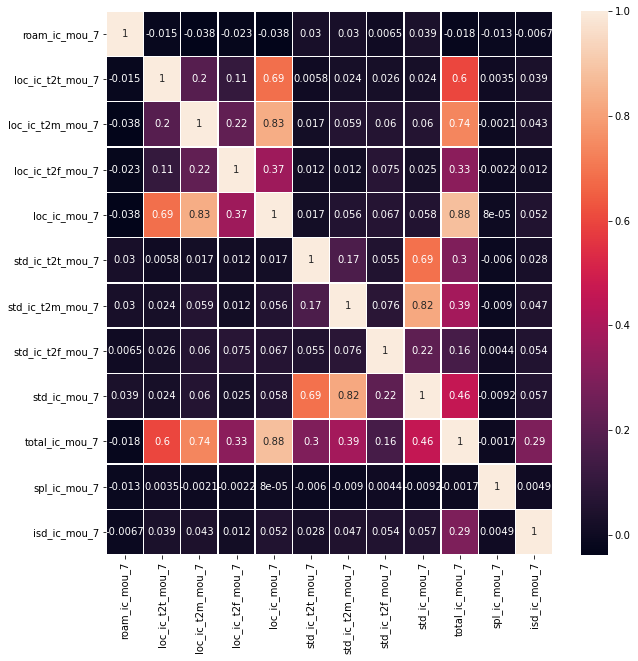

In [126]:
# for 7 month incoming call columns
Incoming_Minutes_columns7 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_ic_.*mou_7')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Incoming_Minutes_columns7].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

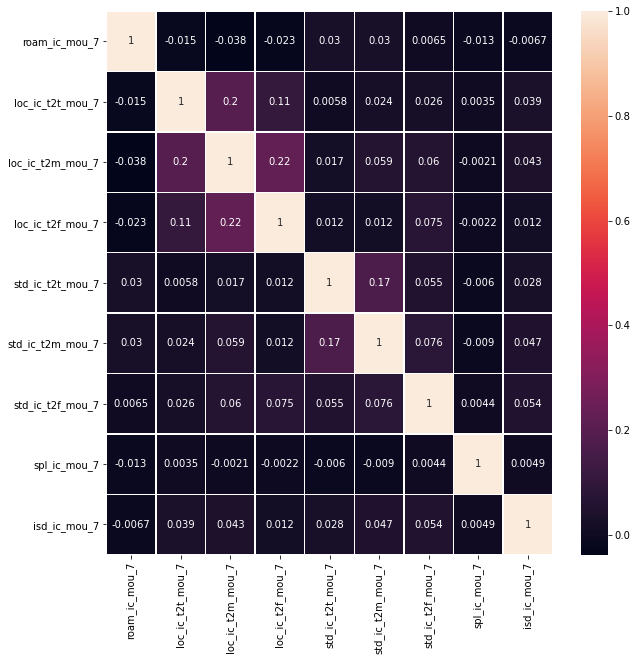

In [127]:
# dropping 3 high correlated columns - total_ic_mou_7, std_ic_mou_7 and loc_ic_mou_7
churn_data_HV.drop(['std_ic_mou_7', 'total_ic_mou_7', 'loc_ic_mou_7'],axis=1,inplace=True)
Incoming_Minutes_columns7 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_ic_.*mou_7')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Incoming_Minutes_columns7].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

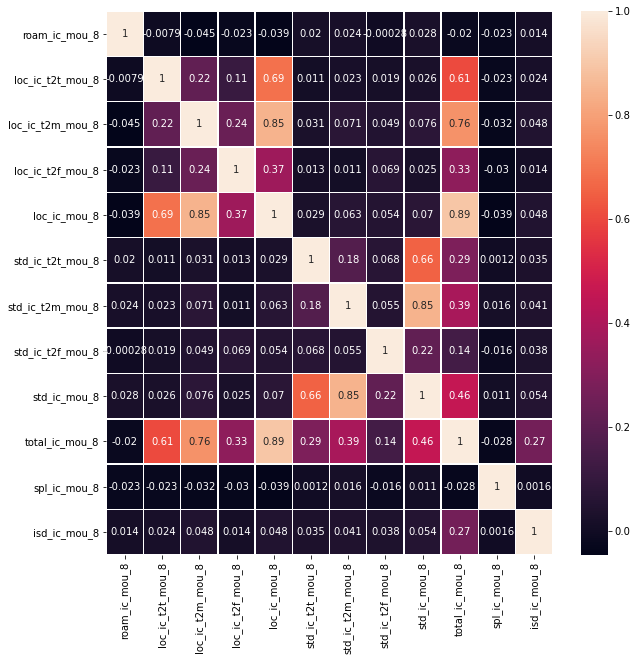

In [128]:
# for 8 month incoming call columns
Incoming_Minutes_columns8 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_ic_.*mou_8')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Incoming_Minutes_columns8].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

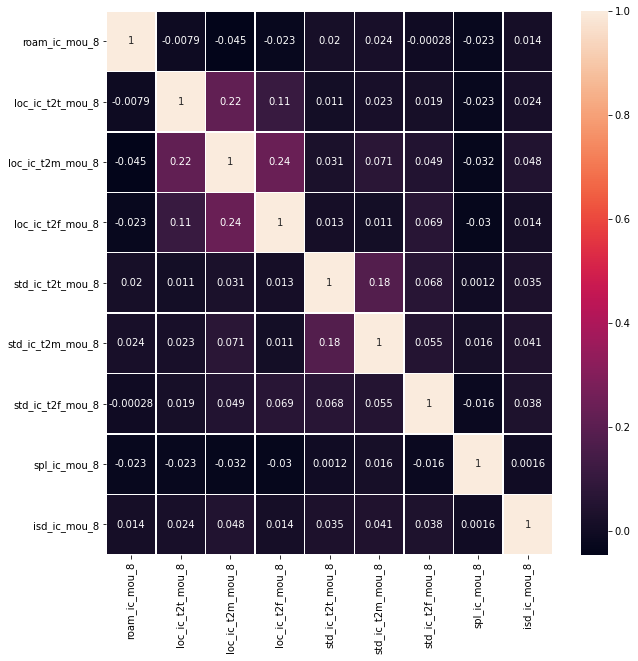

In [129]:
# dropping 3 high correlated columns - total_ic_mou_8, std_ic_mou_8 and loc_ic_mou_8
churn_data_HV.drop(['std_ic_mou_8', 'total_ic_mou_8', 'loc_ic_mou_8'],axis=1,inplace=True)
Incoming_Minutes_columns8 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_ic_.*mou_8')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[Incoming_Minutes_columns8].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

In [130]:
churn_data_HV.shape

(28504, 120)

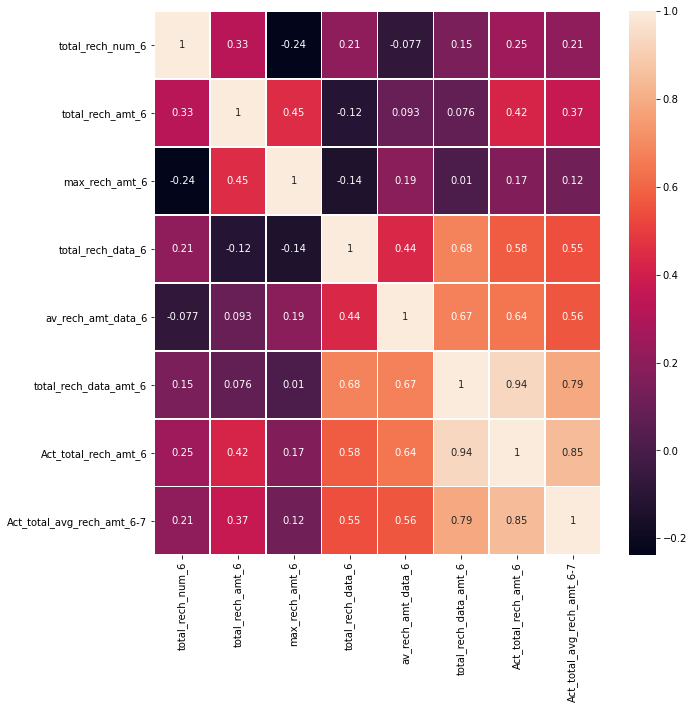

In [131]:
# for rech columns
rech_columns6 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_rech_.*_6')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[rech_columns6].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

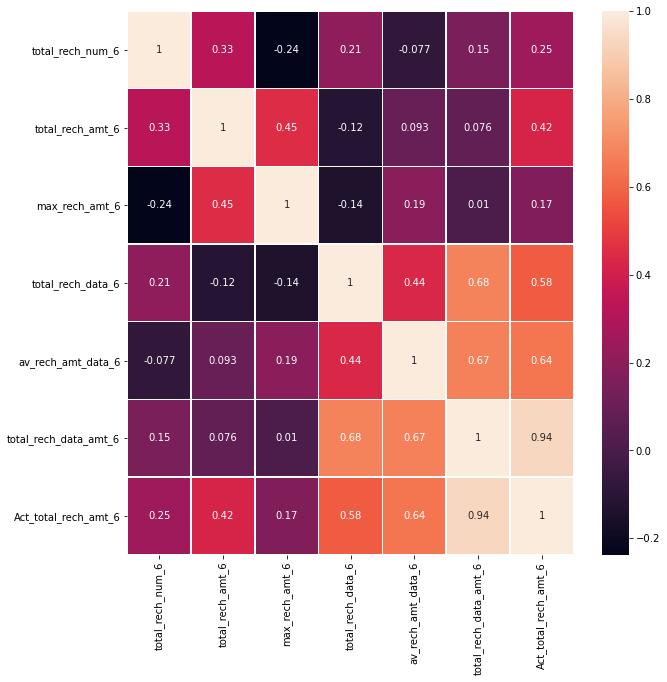

In [132]:
# dropping 1 high correlated column - Act_total_avg_rech_amt_6-7
churn_data_HV.drop(['Act_total_avg_rech_amt_6-7'],axis=1,inplace=True)
rech_columns6 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*_rech_.*_6')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[rech_columns6].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

In [133]:
#checking shape
churn_data_HV.shape

(28504, 119)

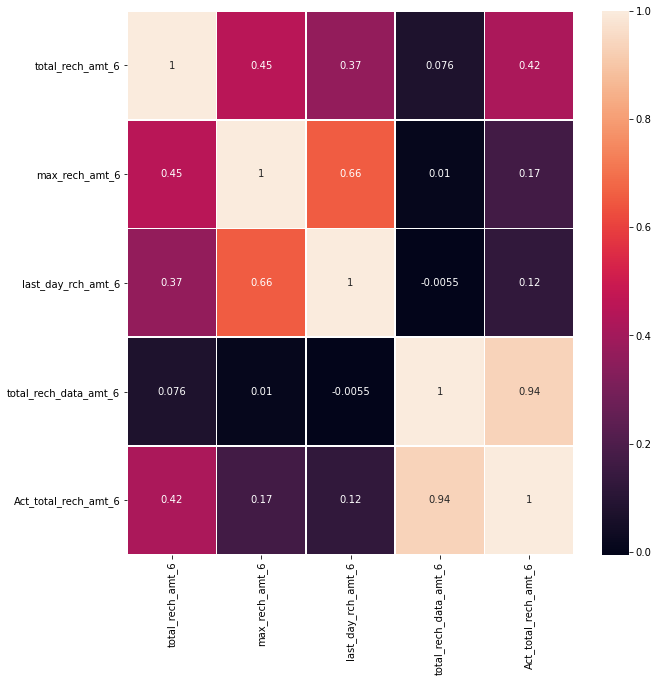

In [134]:
# for amt columns
amt_columns6 =churn_data_HV.columns[churn_data_HV.columns.str.contains('.*amt_6')]
fig, ax = plt.subplots(figsize=(10,10)) 
corr = churn_data_HV[amt_columns6].corr()
ax=sns.heatmap(corr, annot = True,linewidths=.5)

#### for amount columns we won't anything at present

### feature engineering 

In [135]:
# we will convert in months as it basically time period only (we will divide by 30 by assuming 30 days per month)
churn_data_HV['aon_month'] = churn_data_HV['aon']/30
churn_data_HV['aon_month'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_month, dtype: float64

#### not treating categorical columns but it will further increase dimensionality

#### as 6 & 7 month are good pahse we will combine respective columns in each categories, so curse dimensionality can be reduced

In [136]:
# we will check unique types of columns which are common for 6 & 7 months
columns_67_list = churn_data_HV.filter(regex='_6|_7').columns.str[:-2]
columns_67_list

Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou',
       'std_og_t2t_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_t2f_mou', 'isd_og_mou', 'isd_og_mou',
       'spl_og_mou', 'spl_og_mou', 'og_others', 'og_others', 'loc_ic_t2t_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
       'loc_ic_t2f_mou', 'std_ic_t2t_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2f_mou', 'spl_ic_mou',
       'spl_ic_mou', 'isd_ic_mou', 'isd_ic_mou', 'ic_others', 'ic_others',
       'total_rech_num', 'total_rech_num', 'total_rech_amt', 'total_rech_amt',
       'max_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'last_day_rch_amt',
   

In [137]:
len(columns_67_list)

76

In [138]:
# we will drive new feature which will be average of 6 & 7 months (good phase)
for index, column in enumerate(columns_67_list.unique()):
    average_column_name = column + "_av67"
    column_6 = column+"_6"
    column_7 = column+"_7"
    churn_data_HV[average_column_name] = (churn_data_HV[column_6]  + churn_data_HV[column_7])/ 2

In [139]:
churn_data_HV.shape

(28504, 158)

In [140]:
# now we will drop 6 & 7 month features & will work with avg6-7 month features
list_to_drop = churn_data_HV.filter(regex='_6|_7')
churn_data_HV.drop(list_to_drop,axis=1,inplace=True)
churn_data_HV.shape

(28504, 82)

#### now we have 82 features to work with

In [141]:
# we will drop AON column as we have aon_month
churn_data_HV.drop('aon',axis=1,inplace=True)


# Modeling

## 1. Logistic Regression with RFE & Manual Tuning

In [142]:
# X & Y divide
y = churn_data_HV["Churn"]
X = churn_data_HV.drop(["Churn"],axis=1)

In [143]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)

In [144]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19952, 80)
(19952,)
(8552, 80)
(8552,)


In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19952 entries, 61445 to 93118
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   arpu_8                    19952 non-null  float64
 1   onnet_mou_8               19952 non-null  float64
 2   offnet_mou_8              19952 non-null  float64
 3   roam_ic_mou_8             19952 non-null  float64
 4   roam_og_mou_8             19952 non-null  float64
 5   loc_og_t2t_mou_8          19952 non-null  float64
 6   loc_og_t2m_mou_8          19952 non-null  float64
 7   loc_og_t2f_mou_8          19952 non-null  float64
 8   loc_og_t2c_mou_8          19952 non-null  float64
 9   std_og_t2t_mou_8          19952 non-null  float64
 10  std_og_t2m_mou_8          19952 non-null  float64
 11  std_og_t2f_mou_8          19952 non-null  float64
 12  isd_og_mou_8              19952 non-null  float64
 13  spl_og_mou_8              19952 non-null  float64
 14  og

In [146]:
num_cols=X_train.columns

In [147]:
# scaling (fit + transform X-train)
scaler = StandardScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_8,Act_total_rech_amt_8,aon_month,arpu_av67,onnet_mou_av67,offnet_mou_av67,roam_ic_mou_av67,roam_og_mou_av67,loc_og_t2t_mou_av67,loc_og_t2m_mou_av67,loc_og_t2f_mou_av67,loc_og_t2c_mou_av67,std_og_t2t_mou_av67,std_og_t2m_mou_av67,std_og_t2f_mou_av67,isd_og_mou_av67,spl_og_mou_av67,og_others_av67,loc_ic_t2t_mou_av67,loc_ic_t2m_mou_av67,loc_ic_t2f_mou_av67,std_ic_t2t_mou_av67,std_ic_t2m_mou_av67,std_ic_t2f_mou_av67,spl_ic_mou_av67,isd_ic_mou_av67,ic_others_av67,total_rech_num_av67,total_rech_amt_av67,max_rech_amt_av67,last_day_rch_amt_av67,total_rech_data_av67,av_rech_amt_data_av67,vol_2g_mb_av67,vol_3g_mb_av67,monthly_2g_av67,sachet_2g_av67,monthly_3g_av67,sachet_3g_av67,total_rech_data_amt_av67,Act_total_rech_amt_av67
61445,1.667135,-0.036322,0.554754,0.648901,0.364849,0.337389,1.701978,0.492573,-0.232249,-0.367213,-0.389567,-0.153329,-0.036796,1.686210,-0.017888,0.620266,2.371800,0.632393,0.587232,0.313712,-0.126079,-0.240554,0.331039,0.371433,0.294046,1.267907,-0.195007,0.240836,-0.544498,-0.642953,-0.34667,-0.392798,-0.38724,-0.422704,-0.336412,-0.182223,0.073599,-0.208073,0.178694,-0.270377,0.170066,2.493712,0.829381,-0.000296,0.229748,4.224697,2.304314,0.198777,0.601170,-0.041515,0.132688,-0.351390,-0.388407,-0.116827,-0.039429,-0.235223,0.178241,0.289816,0.792870,0.009523,0.041354,0.188287,0.239409,1.907964,-0.032606,0.196955,0.248760,0.750508,-0.334169,-0.090585,-0.648062,-0.752953,-0.421717,-0.435473,-0.468563,-0.472335,-0.376785,-0.234047,-0.381019,-0.070229
14965,-0.351495,-0.512475,-0.563079,-0.169139,-0.186959,-0.323517,-0.368445,-0.198180,-0.232249,-0.384114,-0.393637,-0.110895,-0.036796,-0.315990,-0.017888,-0.302010,-0.564997,-0.304997,-0.214999,-0.267187,-0.034418,-0.240554,-0.066803,-0.099180,-0.897250,-0.475702,0.789113,-0.643806,-0.544498,-0.642953,-0.34667,-0.392798,-0.38724,-0.422704,-0.336412,-0.182223,-0.415230,-0.410147,-0.378980,-0.270377,-0.400625,0.755305,-0.896180,-0.584436,-0.742174,-0.223418,-0.250507,-0.340214,-0.581064,-0.093822,-0.274147,-0.444711,-0.459471,-0.164882,-0.039429,-0.363243,-0.177904,-0.412396,-0.449906,0.499739,-0.212020,-0.312248,-0.151767,-0.391950,-0.152764,-0.098063,-0.993178,-1.016873,-0.288598,-0.868535,-0.105258,1.383186,-0.383043,0.697892,-0.468563,-0.472335,2.233797,-0.234047,0.098044,-0.287063
6863,0.626302,-0.080889,2.270516,-0.169139,-0.186959,0.493558,5.436209,-0.336330,-0.145876,-0.369524,-0.360459,-0.153329,-0.036796,0.045403,-0.017888,-0.007843,0.390145,-0.343136,0.011971,-0.129461,-0.086863,-0.240554,-0.156608,-0.099180,0.185747,0.567656,-0.195007,-0.303559,-0.544498,-0.642953,-0.34667,-0.392798,-0.38724,-0.422704,-0.336412,-0.182223,-0.415230,-0.410147,-0.378980,-0.270377,-0.059129,-0.771479,0.578621,0.477992,1.332716,-0.223418,-0.250507,1.580799,3.476510,-0.296045,-0.274147,-0.361141,-0.407508,-0.164882,-0.039429,-0.363243,-0.177904,0.297925,0.211692,-0.346152,0.073063,-0.203178,-0.038933,-0.391950,-0.147913,-0.084919,0.130480,0.459697,-0.392760,-0.177024,-0.648062,-0.752953,-0.421717,-0.435473,-0.468563,-0.472335,-0.376785,-0.234047,-0.381019,-0.177951
15257,0.015176,-0.232961,2.251192,-0.169139,-0.186959,0.221437,5.418928,-0.043648,0.196959,-0.384114,-0.375168,-0.153329,-0.036796,-0.166910,-0.017888,-0.322607,0.176802,-0.140264,-0.214999,-0.040556,-0.126079,-0.240554,0.117447,-0.099180,-0.572351,-0.163786,0.499666,1.057429,-0.544498,-0.642953,-0.34667,-0.392798,-0.38724,-0.422704,-0.3

In [148]:
# scaling (transform X-test)
X_test[num_cols]=scaler.transform(X_test[num_cols])
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_8,Act_total_rech_amt_8,aon_month,arpu_av67,onnet_mou_av67,offnet_mou_av67,roam_ic_mou_av67,roam_og_mou_av67,loc_og_t2t_mou_av67,loc_og_t2m_mou_av67,loc_og_t2f_mou_av67,loc_og_t2c_mou_av67,std_og_t2t_mou_av67,std_og_t2m_mou_av67,std_og_t2f_mou_av67,isd_og_mou_av67,spl_og_mou_av67,og_others_av67,loc_ic_t2t_mou_av67,loc_ic_t2m_mou_av67,loc_ic_t2f_mou_av67,std_ic_t2t_mou_av67,std_ic_t2m_mou_av67,std_ic_t2f_mou_av67,spl_ic_mou_av67,isd_ic_mou_av67,ic_others_av67,total_rech_num_av67,total_rech_amt_av67,max_rech_amt_av67,last_day_rch_amt_av67,total_rech_data_av67,av_rech_amt_data_av67,vol_2g_mb_av67,vol_3g_mb_av67,monthly_2g_av67,sachet_2g_av67,monthly_3g_av67,sachet_3g_av67,total_rech_data_amt_av67,Act_total_rech_amt_av67
84453,0.055313,-0.209322,-0.225618,-0.169139,-0.186959,0.267524,0.195557,-0.242956,0.349774,-0.384114,-0.323878,-0.153329,-0.036796,-0.113831,-0.017888,0.418433,0.853239,0.111774,-0.213793,-0.006057,0.158824,-0.240554,-0.156608,-0.09918,-0.788951,0.045197,0.933837,1.567800,-0.219399,0.295608,-0.346670,0.092379,-0.387240,-0.422704,1.274750,-0.182223,-0.415230,-0.410147,-0.378980,-0.169510,-0.138760,1.431467,-0.477277,-0.307918,-0.373728,-0.223418,-0.250507,0.196639,0.046597,-0.204274,-0.236951,-0.444711,-0.392787,-0.164882,-0.039429,-0.350028,-0.177904,0.496856,0.459938,0.232839,-0.219928,-0.006202,0.388607,-0.391950,-0.152764,-0.098063,-1.052318,-0.529999,0.294055,0.125512,-0.286193,0.464872,-0.421717,0.513012,-0.468563,-0.472335,1.363603,-0.234047,-0.217149,-0.394786
28515,-0.442990,-0.428610,0.071652,-0.153923,-0.148220,-0.160010,0.283860,-0.243502,0.274031,-0.384114,-0.123075,0.286100,-0.036796,1.363587,-0.017888,-0.297038,0.872075,-0.348420,-0.214999,2.550925,-0.126079,-0.240554,-0.156608,-0.03173,0.618945,-0.417998,-0.559711,-0.439658,1.080996,-0.039967,-0.218749,-0.392798,-0.387240,1.507225,-0.336412,-0.182223,-0.415230,-0.410147,-0.378980,0.053636,-0.088225,-0.162417,-0.294059,-0.448878,0.260448,-0.223418,-0.250507,-0.086994,0.810376,-0.001117,-0.087390,-0.438848,-0.128892,0.288777,-0.039429,-0.285055,-0.177904,-0.225027,1.769839,-0.219641,-0.203667,2.006650,1.222831,2.195453,-0.152764,-0.098063,0.189620,-0.314236,-0.532727,-0.544389,0.256611,-0.467569,-0.153933,-0.435473,-0.468563,0.537484,-0.376785,-0.234047,-0.189014,-0.289148
64461,0.060073,-0.498558,-0.523457,0.119831,-0.087506,-0.320372,-0.514367,0.278521,-0.232249,-0.369775,-0.313906,-0.153329,0.022571,-0.292912,-0.017888,-0.314025,-0.161665,-0.276967,-0.214999,0.205080,-0.126079,-0.240554,-0.095873,-0.09918,-0.680651,0.017125,0.511244,1.071039,0.105699,1.485850,5.054532,-0.392798,2.038571,-0.422704,1.274750,-0.182223,-0.415230,-0.410147,-0.378980,0.187186,0.175171,-0.050928,0.364088,-0.588080,-0.481202,0.248403,-0.201309,-0.347905,-0.305588,-0.218285,-0.274147,-0.444347,-0.334310,-0.164882,-0.039429,0.049450,-0.177904,-0.338275,0.637484,-0.308532,-0.144094,0.898539,-0.151767,-0.391950,-0.152764,-0.098063,-0.224359,0.198905,0.531673,0.436692,0.075677,2.095232,5.803979,-0.435473,-0.468563,-0.472335,3.103991,-0.234047,0.385481,0.425989
2074,-1.011806,-0.522993,-0.714729,-0.169139,-0.186959,-0.344024,-0.670783,-0.336330,-0.232249,-0.384114,-0.393637,-0.153329,-0.036796,-0.315990,-0.017888,-0.393988,-0.683842,-0.348420,-0.214999,-0.268538,-0.058515,-0.240554,-0.156608,-0.09918,-0.788951,-0.943576,-0.947570,-0.643806,-0.544498,-0.642953,-0.346670,-0.392798,-0.387240,-0.422704,-

### Imbalance classs overcome thru different techniques

### Random Undersampling

In [149]:
# Random Undersampling
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

2234

In [150]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 1117), (1, 1117)]


In [151]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [152]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.7947848456501403
F1 score:  0.29771908763505406
Recall:  0.7766179540709812
Precision:  0.18415841584158416

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8073
           1       0.18      0.78      0.30       479

    accuracy                           0.79      8552
   macro avg       0.58      0.79      0.59      8552
weighted avg       0.94      0.79      0.85      8552


 confussion matrix:
 [[6425 1648]
 [ 107  372]]


### Random OverSampling

In [153]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

37670

In [154]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 18835), (1, 18835)]


In [155]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [156]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.789756782039289
F1 score:  0.29765624999999996
Recall:  0.7954070981210856
Precision:  0.1830850552618933

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      8073
           1       0.18      0.80      0.30       479

    accuracy                           0.79      8552
   macro avg       0.58      0.79      0.59      8552
weighted avg       0.94      0.79      0.84      8552


 confussion matrix:
 [[6373 1700]
 [  98  381]]


### SMOTE

In [157]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

37670

In [158]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 18835), (1, 18835)]


In [159]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [160]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.7980589335827877
F1 score:  0.3027856277755349
Recall:  0.7828810020876826
Precision:  0.18768768768768768

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8073
           1       0.19      0.78      0.30       479

    accuracy                           0.80      8552
   macro avg       0.59      0.79      0.59      8552
weighted avg       0.94      0.80      0.85      8552


 confussion matrix:
 [[6450 1623]
 [ 104  375]]


### ADASYN

In [161]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

37782

In [162]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 18835), (1, 18947)]


In [163]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [164]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.7736202057998129
F1 score:  0.2834937083641747
Recall:  0.7995824634655533
Precision:  0.17228969860548807

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.87      8073
           1       0.17      0.80      0.28       479

    accuracy                           0.77      8552
   macro avg       0.58      0.79      0.57      8552
weighted avg       0.94      0.77      0.83      8552


 confussion matrix:
 [[6233 1840]
 [  96  383]]


### SMOTE+TOMEK

In [165]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

37668

In [166]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 18834), (1, 18834)]


In [167]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [168]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.7984097287184284
F1 score:  0.30315278900565884
Recall:  0.7828810020876826
Precision:  0.18796992481203006

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8073
           1       0.19      0.78      0.30       479

    accuracy                           0.80      8552
   macro avg       0.59      0.79      0.59      8552
weighted avg       0.94      0.80      0.85      8552


 confussion matrix:
 [[6453 1620]
 [ 104  375]]


### we will use SMOTE only

### Model preparation

In [169]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [170]:
X_train_sm = sm.add_constant(X_resampled_smt)

logm1 = sm.Logit(y_resampled_smt, X_train_sm)
logm1_model = logm1.fit()

logm1_model.summary()

         Current function value: 0.407856
         Iterations: 35


C:\Users\Ramya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                          Logit   Df Residuals:                    37593
Method:                           MLE   Df Model:                           76
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                  0.4116
Time:                        21:32:04   Log-Likelihood:                -15364.
converged:                      False   LL-Null:                       -26111.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.7964      0.028    -65.160      0.000      -1.850      -1.742
arpu_8                       1.0151      0.089     11.378      0.000       0.840       1.190
onnet_mou_8                  0.5600      1.513      0.370      0.711      -2.405       3.525
offnet_mou_8                -0.0385      1.586     -0.024      0.981      -3.146       3.069
roam_ic_mou_8               -0.0318      0.016     -1.937      0.053      -0.064       0.000
roam_og_mou_8                0.0321      0.372      0.086      0.931      -0.697       0.762
loc_og_t2t_mou_8            -1.0269      0.779     -1.317      0.188      -2.555       0.501
loc_og_t2m_mou_8            -0.3314      0.768     -0.431      0.666      -1.837       1.174
loc_og_t2f_mou_8            -0.1093      0.071     -1.550      0.121      -0.248       0.029
loc_og_t2c_mou_8             0.1289      0.027      4.801      0.000       0.076       0.181
std_og_t2t_mou_8            -0.9504      1.298     -0.732      0.464      -3.495       1.594
std_og_t2m_mou_8            -0.4639      1.355     -0.342      0.732      -3.119       2.191
std_og_t2f_mou_8            -0.1279      0.052     -2.460      0.014      -0.230      -0.026
isd_og_mou_8                -0.1375      0.165     -0.836      0.403      -0.460       0.185
spl_og_mou_8                -0.3280      0.067     -4.870      0.000      -0.460      -0.196
og_others_8                  0.0697      0.031      2.230      0.026       0.008       0.131
loc_ic_t2t_mou_8            -0.4562      0.062     -7.412      0.000      -0.577      -0.336
loc_ic_t2m_mou_8            -1.5208      0.068    -22.426      0.000      -1.654      -1.388
loc_ic_t2f_mou_8            -0.8020      0.075    -10.734      0.000      -0.948      -0.656
std_ic_t2t_mou_8            -0.5953      0.054    -10.960      0.000      -0.702      -0.489
std_ic_t2m_mou_8            -0.2132      0.043     -4.910      0.000      -0.298      -0.128
std_ic_t2f_mou_8            -0.4405      0.081     -5.452      0.000      -0.599      -0.282
spl_ic_mou_8                -0.2481      0.023    -10.957      0.000      -0.292      -0.204
isd_ic_mou_8                -0.1817      0.037     -4.966      0.000      -0.253      -0.110
ic_others_8                  0.1736      0.039      4.429      0.000       0.097       0.250
total_rech_num_8            -0.2369      0.037     -6.469      0.000      -0.309      -0.165
total_rech_amt_8            -1.1100        nan        nan        nan         nan         nan
max_rech_amt_8               0.3945      0.033     11.914      0.000       0.330       0.459
last_day_rch_amt_8          -0.5323      0.028    -18.894      0.000      -0.587      -0.477
total_rech_data_8           -0.6511        nan        nan        nan         nan         nan
av_rech_amt_data_8          -0.4928      0.080     -6.158      0.000      -0.650      -0.336
vol_2g_mb_8                 -0.2813      0.034     -8.238      0.000      -0.34

### In basic model We can see some features are having very high P values & same need to be dropped, but as number of features are also very high so we will use RFE technique & VIF instead of going for manual feature selection after RFE we will do manual fine tunning.

In [171]:
cols=X_resampled_smt.columns
len(cols)

80

In [172]:
# Checking VIFs as in basic model some npn values availbe they be result of inifinite VIF
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt.columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
40,Act_total_rech_amt_8,inf
25,total_rech_amt_8,inf
78,total_rech_data_amt_av67,inf
77,sachet_3g_av67,inf
76,monthly_3g_av67,inf
75,sachet_2g_av67,inf
74,monthly_2g_av67,inf
70,total_rech_data_av67,inf
67,total_rech_amt_av67,inf
39,total_rech_data_amt_8,inf


### We can see total rech amt & total rech data amt av are almost perfect colinear , so we will drop some of these columns
#### we will first drop act columns which were derived by us

In [173]:
cols = cols.drop(['Act_total_rech_amt_8', 'Act_total_rech_amt_av67'],1)
len(cols)

78

In [174]:
X_resampled_smt.drop(['Act_total_rech_amt_8', 'Act_total_rech_amt_av67'],axis=1,inplace=True)

In [175]:
# Checking VIFs as in basic model some npn values availbe they be result of inifinite VIF
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt.columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
35,sachet_3g_8,inf
75,monthly_3g_av67,inf
28,total_rech_data_8,inf
33,sachet_2g_8,inf
69,total_rech_data_av67,inf
34,monthly_3g_8,inf
73,monthly_2g_av67,inf
74,sachet_2g_av67,inf
32,monthly_2g_8,inf
76,sachet_3g_av67,inf


In [176]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
35,sachet_3g_8,inf
75,monthly_3g_av67,inf
28,total_rech_data_8,inf
33,sachet_2g_8,inf
69,total_rech_data_av67,inf
34,monthly_3g_8,inf
73,monthly_2g_av67,inf
74,sachet_2g_av67,inf
32,monthly_2g_8,inf
76,sachet_3g_av67,inf


### now we can see infinte values has been removed even now some very high colinear features available

## Using RFE for getting important features

In [177]:
# checking 50 features

logreg = LogisticRegression()
rfe = RFE(logreg, 50)   
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [178]:
list(zip(X_resampled_smt.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 21),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', False, 29),
 ('loc_og_t2f_mou_8', False, 16),
 ('loc_og_t2c_mou_8', False, 5),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 6),
 ('isd_og_mou_8', False, 12),
 ('spl_og_mou_8', True, 1),
 ('og_others_8', False, 18),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_8', True, 1),
 ('std_ic_t2f_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('av_rech_amt_data_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_8', True, 1),
 ('monthly_2g_8', True

In [179]:
cols = X_resampled_smt.columns[rfe.support_]
X_resampled_smt.columns[~rfe.support_]

Index(['roam_ic_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'og_others_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'onnet_mou_av67',
       'offnet_mou_av67', 'roam_ic_mou_av67', 'loc_og_t2m_mou_av67',
       'loc_og_t2f_mou_av67', 'loc_og_t2c_mou_av67', 'std_og_t2f_mou_av67',
       'isd_og_mou_av67', 'spl_og_mou_av67', 'og_others_av67',
       'std_ic_t2m_mou_av67', 'spl_ic_mou_av67', 'total_rech_num_av67',
       'max_rech_amt_av67', 'last_day_rch_amt_av67', 'sachet_2g_av67',
       'monthly_3g_av67', 'total_rech_data_amt_av67'],
      dtype='object')

In [180]:
len(cols)

50

In [181]:
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37620
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15459.
Date:                Mon, 16 Aug 2021   Deviance:                       30919.
Time:                        21:34:40   Pearson chi2:                 9.81e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7713      0.027    -65.149      0.000      -1.825      -1.718
arpu_8                    0.8499      0.082     10.408      0.000       0.690       1.010
onnet_mou_8              -0.4310      0.222     -1.944      0.052      -0.865       0.004
offnet_mou_8             -1.0171      0.078    -12.984      0.000      -1.171      -0.864
roam_og_mou_8             0.2344      0.033      7.200      0.000       0.171       0.298
loc_og_t2t_mou_8         -0.5221      0.135     -3.856      0.000      -0.788      -0.257
std_og_t2t_mou_8         -0.1162      0.192     -0.603      0.546      -0.493       0.261
std_og_t2m_mou_8          0.3452      0.073      4.741      0.000       0.203       0.488
spl_og_mou_8             -0.1485      0.027     -5.459      0.000      -0.202      -0.095
loc_ic_t2t_mou_8         -0.4453      0.061     -7.318      0.000      -0.565      -0.326
loc_ic_t2m_mou_8         -1.4779      0.065    -22.635      0.000      -1.606      -1.350
loc_ic_t2f_mou_8         -0.8652      0.074    -11.654      0.000      -1.011      -0.720
std_ic_t2t_mou_8         -0.6167      0.054    -11.345      0.000      -0.723      -0.510
std_ic_t2m_mou_8         -0.1584      0.031     -5.164      0.000      -0.218      -0.098
std_ic_t2f_mou_8         -0.4974      0.082     -6.088      0.000      -0.658      -0.337
spl_ic_mou_8             -0.2437      0.022    -10.881      0.000      -0.288      -0.200
isd_ic_mou_8             -0.1740      0.035     -4.924      0.000      -0.243      -0.105
ic_others_8               0.1741      0.039      4.476      0.000       0.098       0.250
total_rech_num_8         -0.1743      0.025     -6.868      0.000      -0.224      -0.125
total_rech_amt_8         -0.9166      0.082    -11.188      0.000      -1.077      -0.756
max_rech_amt_8            0.3438      0.028     12.307      0.000       0.289       0.399
last_day_rch_amt_8       -0.5394      0.027    -19.967      0.000      -0.592      -0.486
total_rech_data_8        -0.4981      0.030    -16.801      0.000      -0.556      -0.440
av_rech_amt_data_8       -0.4202      0.076     -5.531      0.000      -0.569      -0.271
vol_2g_mb_8              -0.2828      0.034     -8.308      0.000      -0.350      -0.216
vol_3g_mb_8              -0.4523      0.059     -7.707      0.000      -0.567      -0.337
monthly_2g_8             -0.3109      0.037     -8.374      0.000      -0.384      -0.238
sachet_2g_8              -0.3294      0.024    -13.533      0.000      -0.377      -0.282
monthly_3g_8             -0.2599      0.055     -4.761      0.000      -0.367      -0.153
sachet_3g_8              -0.3356      0.049     -6.807      0.000      -0.432      -0.239
total_rech_data_amt_8     0.5507      0.070      7.859      0.000       0.413       0.688
aon_month              

In [182]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,monthly_2g_8,inf
21,total_rech_data_8,inf
28,sachet_3g_8,inf
27,monthly_3g_8,inf
26,sachet_2g_8,inf
1,onnet_mou_8,92.26
5,std_og_t2t_mou_8,71.58
31,arpu_av67,22.87
4,loc_og_t2t_mou_8,21.97
43,total_rech_amt_av67,21.83


In [183]:
# we will drop monthly_2g_8
cols = cols.drop(['monthly_2g_8'],1)
len(cols)

49

In [184]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37620
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15459.
Date:                Mon, 16 Aug 2021   Deviance:                       30919.
Time:                        21:34:55   Pearson chi2:                 9.81e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7713      0.027    -65.149      0.000      -1.825      -1.718
arpu_8                    0.8499      0.082     10.408      0.000       0.690       1.010
onnet_mou_8              -0.4310      0.222     -1.944      0.052      -0.865       0.004
offnet_mou_8             -1.0171      0.078    -12.984      0.000      -1.171      -0.864
roam_og_mou_8             0.2344      0.033      7.200      0.000       0.171       0.298
loc_og_t2t_mou_8         -0.5221      0.135     -3.856      0.000      -0.788      -0.257
std_og_t2t_mou_8         -0.1162      0.192     -0.603      0.546      -0.493       0.261
std_og_t2m_mou_8          0.3452      0.073      4.741      0.000       0.203       0.488
spl_og_mou_8             -0.1485      0.027     -5.459      0.000      -0.202      -0.095
loc_ic_t2t_mou_8         -0.4453      0.061     -7.318      0.000      -0.565      -0.326
loc_ic_t2m_mou_8         -1.4779      0.065    -22.635      0.000      -1.606      -1.350
loc_ic_t2f_mou_8         -0.8652      0.074    -11.654      0.000      -1.011      -0.720
std_ic_t2t_mou_8         -0.6167      0.054    -11.345      0.000      -0.723      -0.510
std_ic_t2m_mou_8         -0.1584      0.031     -5.164      0.000      -0.218      -0.098
std_ic_t2f_mou_8         -0.4974      0.082     -6.088      0.000      -0.658      -0.337
spl_ic_mou_8             -0.2437      0.022    -10.881      0.000      -0.288      -0.200
isd_ic_mou_8             -0.1740      0.035     -4.924      0.000      -0.243      -0.105
ic_others_8               0.1741      0.039      4.476      0.000       0.098       0.250
total_rech_num_8         -0.1743      0.025     -6.868      0.000      -0.224      -0.125
total_rech_amt_8         -0.9166      0.082    -11.188      0.000      -1.077      -0.756
max_rech_amt_8            0.3438      0.028     12.307      0.000       0.289       0.399
last_day_rch_amt_8       -0.5394      0.027    -19.967      0.000      -0.592      -0.486
total_rech_data_8        -2.8179      0.292     -9.638      0.000      -3.391      -2.245
av_rech_amt_data_8       -0.4202      0.076     -5.531      0.000      -0.569      -0.271
vol_2g_mb_8              -0.2828      0.034     -8.308      0.000      -0.350      -0.216
vol_3g_mb_8              -0.4523      0.059     -7.707      0.000      -0.567      -0.337
sachet_2g_8               1.6245      0.233      6.967      0.000       1.167       2.082
monthly_3g_8              0.2082      0.056      3.690      0.000       0.098       0.319
sachet_3g_8               0.5390      0.109      4.957      0.000       0.326       0.752
total_rech_data_amt_8     0.5507      0.070      7.859      0.000       0.413       0.688
aon_month                -0.2878      0.018    -16.022      0.000      -0.323      -0.253
arpu_av67              

In [185]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,total_rech_data_8,140.33
1,onnet_mou_8,92.26
25,sachet_2g_8,87.87
5,std_og_t2t_mou_8,71.58
30,arpu_av67,22.87
4,loc_og_t2t_mou_8,21.97
42,total_rech_amt_av67,21.83
0,arpu_8,18.97
18,total_rech_amt_8,17.94
27,sachet_3g_8,17.72


In [186]:
# we will drop std_og_t2t_mou_8
cols = cols.drop(['std_og_t2t_mou_8'],1)
len(cols)

48

In [187]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37621
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15460.
Date:                Mon, 16 Aug 2021   Deviance:                       30919.
Time:                        21:35:12   Pearson chi2:                 9.84e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7720      0.027    -65.212      0.000      -1.825      -1.719
arpu_8                    0.8496      0.082     10.402      0.000       0.690       1.010
onnet_mou_8              -0.5628      0.037    -15.305      0.000      -0.635      -0.491
offnet_mou_8             -1.0319      0.075    -13.817      0.000      -1.178      -0.885
roam_og_mou_8             0.2494      0.021     11.702      0.000       0.208       0.291
loc_og_t2t_mou_8         -0.4519      0.069     -6.524      0.000      -0.588      -0.316
std_og_t2m_mou_8          0.3581      0.070      5.129      0.000       0.221       0.495
spl_og_mou_8             -0.1484      0.027     -5.452      0.000      -0.202      -0.095
loc_ic_t2t_mou_8         -0.4456      0.061     -7.325      0.000      -0.565      -0.326
loc_ic_t2m_mou_8         -1.4738      0.065    -22.708      0.000      -1.601      -1.347
loc_ic_t2f_mou_8         -0.8646      0.074    -11.649      0.000      -1.010      -0.719
std_ic_t2t_mou_8         -0.6167      0.054    -11.345      0.000      -0.723      -0.510
std_ic_t2m_mou_8         -0.1587      0.031     -5.175      0.000      -0.219      -0.099
std_ic_t2f_mou_8         -0.4957      0.082     -6.073      0.000      -0.656      -0.336
spl_ic_mou_8             -0.2438      0.022    -10.883      0.000      -0.288      -0.200
isd_ic_mou_8             -0.1743      0.035     -4.930      0.000      -0.244      -0.105
ic_others_8               0.1747      0.039      4.496      0.000       0.099       0.251
total_rech_num_8         -0.1747      0.025     -6.890      0.000      -0.224      -0.125
total_rech_amt_8         -0.9166      0.082    -11.193      0.000      -1.077      -0.756
max_rech_amt_8            0.3439      0.028     12.311      0.000       0.289       0.399
last_day_rch_amt_8       -0.5407      0.027    -20.094      0.000      -0.593      -0.488
total_rech_data_8        -2.8165      0.292     -9.632      0.000      -3.390      -2.243
av_rech_amt_data_8       -0.4200      0.076     -5.527      0.000      -0.569      -0.271
vol_2g_mb_8              -0.2832      0.034     -8.319      0.000      -0.350      -0.216
vol_3g_mb_8              -0.4529      0.059     -7.716      0.000      -0.568      -0.338
sachet_2g_8               1.6234      0.233      6.962      0.000       1.166       2.080
monthly_3g_8              0.2074      0.056      3.676      0.000       0.097       0.318
sachet_3g_8               0.5385      0.109      4.951      0.000       0.325       0.752
total_rech_data_amt_8     0.5509      0.070      7.859      0.000       0.413       0.688
aon_month                -0.2874      0.018    -16.011      0.000      -0.323      -0.252
arpu_av67                 0.3290      0.081      4.044      0.000       0.170       0.488
roam_og_mou_av67       

In [188]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,total_rech_data_8,140.33
24,sachet_2g_8,87.87
29,arpu_av67,22.87
41,total_rech_amt_av67,21.79
0,arpu_8,18.93
17,total_rech_amt_8,17.93
26,sachet_3g_8,17.72
21,av_rech_amt_data_8,8.42
2,offnet_mou_8,8.18
5,std_og_t2m_mou_8,7.06


In [189]:
# we will drop total_rech_data_8
cols = cols.drop(['total_rech_data_8'],1)
len(cols)

47

In [190]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37622
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15506.
Date:                Mon, 16 Aug 2021   Deviance:                       31013.
Time:                        21:35:27   Pearson chi2:                 1.08e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7642      0.027    -65.148      0.000      -1.817      -1.711
arpu_8                    0.8597      0.081     10.660      0.000       0.702       1.018
onnet_mou_8              -0.5564      0.037    -15.175      0.000      -0.628      -0.485
offnet_mou_8             -1.0225      0.074    -13.752      0.000      -1.168      -0.877
roam_og_mou_8             0.2537      0.021     11.916      0.000       0.212       0.295
loc_og_t2t_mou_8         -0.4523      0.069     -6.532      0.000      -0.588      -0.317
std_og_t2m_mou_8          0.3587      0.070      5.154      0.000       0.222       0.495
spl_og_mou_8             -0.1474      0.027     -5.429      0.000      -0.201      -0.094
loc_ic_t2t_mou_8         -0.4491      0.061     -7.400      0.000      -0.568      -0.330
loc_ic_t2m_mou_8         -1.4690      0.065    -22.751      0.000      -1.596      -1.342
loc_ic_t2f_mou_8         -0.8707      0.074    -11.730      0.000      -1.016      -0.725
std_ic_t2t_mou_8         -0.6146      0.054    -11.301      0.000      -0.721      -0.508
std_ic_t2m_mou_8         -0.1601      0.031     -5.208      0.000      -0.220      -0.100
std_ic_t2f_mou_8         -0.5114      0.082     -6.239      0.000      -0.672      -0.351
spl_ic_mou_8             -0.2434      0.022    -10.878      0.000      -0.287      -0.200
isd_ic_mou_8             -0.1727      0.035     -4.911      0.000      -0.242      -0.104
ic_others_8               0.1707      0.039      4.394      0.000       0.095       0.247
total_rech_num_8         -0.1795      0.025     -7.088      0.000      -0.229      -0.130
total_rech_amt_8         -0.9443      0.081    -11.660      0.000      -1.103      -0.786
max_rech_amt_8            0.3375      0.028     12.099      0.000       0.283       0.392
last_day_rch_amt_8       -0.5404      0.027    -20.041      0.000      -0.593      -0.488
av_rech_amt_data_8       -0.8377      0.066    -12.728      0.000      -0.967      -0.709
vol_2g_mb_8              -0.3553      0.034    -10.534      0.000      -0.421      -0.289
vol_3g_mb_8              -0.5082      0.060     -8.452      0.000      -0.626      -0.390
sachet_2g_8              -0.5745      0.040    -14.485      0.000      -0.652      -0.497
monthly_3g_8             -0.0300      0.049     -0.617      0.538      -0.125       0.065
sachet_3g_8              -0.3693      0.051     -7.225      0.000      -0.469      -0.269
total_rech_data_amt_8     0.5387      0.065      8.299      0.000       0.412       0.666
aon_month                -0.2871      0.018    -16.019      0.000      -0.322      -0.252
arpu_av67                 0.3617      0.078      4.607      0.000       0.208       0.516
roam_og_mou_av67          0.2197      0.019     11.684      0.000       0.183       0.257
loc_og_t2t_mou_av67    

In [191]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,arpu_av67,22.86
40,total_rech_amt_av67,21.79
0,arpu_8,18.93
17,total_rech_amt_8,17.92
2,offnet_mou_8,8.18
5,std_og_t2m_mou_8,7.06
20,av_rech_amt_data_8,7.01
42,av_rech_amt_data_av67,5.69
44,vol_3g_mb_av67,4.84
22,vol_3g_mb_8,4.61


In [192]:
# we will drop monthly_3g_8
cols = cols.drop(['monthly_3g_8'],1)
len(cols)

46

In [193]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37623
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15506.
Date:                Mon, 16 Aug 2021   Deviance:                       31013.
Time:                        21:35:41   Pearson chi2:                 1.09e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7644      0.027    -65.158      0.000      -1.817      -1.711
arpu_8                    0.8605      0.081     10.674      0.000       0.703       1.019
onnet_mou_8              -0.5561      0.037    -15.172      0.000      -0.628      -0.484
offnet_mou_8             -1.0219      0.074    -13.747      0.000      -1.168      -0.876
roam_og_mou_8             0.2534      0.021     11.911      0.000       0.212       0.295
loc_og_t2t_mou_8         -0.4523      0.069     -6.532      0.000      -0.588      -0.317
std_og_t2m_mou_8          0.3582      0.070      5.148      0.000       0.222       0.495
spl_og_mou_8             -0.1476      0.027     -5.438      0.000      -0.201      -0.094
loc_ic_t2t_mou_8         -0.4490      0.061     -7.398      0.000      -0.568      -0.330
loc_ic_t2m_mou_8         -1.4691      0.065    -22.749      0.000      -1.596      -1.343
loc_ic_t2f_mou_8         -0.8707      0.074    -11.730      0.000      -1.016      -0.725
std_ic_t2t_mou_8         -0.6148      0.054    -11.303      0.000      -0.721      -0.508
std_ic_t2m_mou_8         -0.1599      0.031     -5.206      0.000      -0.220      -0.100
std_ic_t2f_mou_8         -0.5107      0.082     -6.235      0.000      -0.671      -0.350
spl_ic_mou_8             -0.2435      0.022    -10.882      0.000      -0.287      -0.200
isd_ic_mou_8             -0.1726      0.035     -4.910      0.000      -0.242      -0.104
ic_others_8               0.1708      0.039      4.395      0.000       0.095       0.247
total_rech_num_8         -0.1797      0.025     -7.101      0.000      -0.229      -0.130
total_rech_amt_8         -0.9449      0.081    -11.684      0.000      -1.103      -0.786
max_rech_amt_8            0.3374      0.028     12.099      0.000       0.283       0.392
last_day_rch_amt_8       -0.5402      0.027    -20.039      0.000      -0.593      -0.487
av_rech_amt_data_8       -0.8595      0.055    -15.490      0.000      -0.968      -0.751
vol_2g_mb_8              -0.3526      0.033    -10.546      0.000      -0.418      -0.287
vol_3g_mb_8              -0.5116      0.060     -8.529      0.000      -0.629      -0.394
sachet_2g_8              -0.5670      0.038    -15.013      0.000      -0.641      -0.493
sachet_3g_8              -0.3626      0.050     -7.277      0.000      -0.460      -0.265
total_rech_data_amt_8     0.5371      0.065      8.320      0.000       0.411       0.664
aon_month                -0.2872      0.018    -16.028      0.000      -0.322      -0.252
arpu_av67                 0.3624      0.078      4.625      0.000       0.209       0.516
roam_og_mou_av67          0.2199      0.019     11.697      0.000       0.183       0.257
loc_og_t2t_mou_av67       0.3851      0.039      9.774      0.000       0.308       0.462
std_og_t2t_mou_av67    

In [194]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,arpu_av67,22.86
39,total_rech_amt_av67,21.79
0,arpu_8,18.93
17,total_rech_amt_8,17.92
2,offnet_mou_8,8.18
5,std_og_t2m_mou_8,7.06
41,av_rech_amt_data_av67,5.65
20,av_rech_amt_data_8,5.24
43,vol_3g_mb_av67,4.84
22,vol_3g_mb_8,4.58


In [195]:
# we will drop arpu_av67
cols = cols.drop(['arpu_av67'],1)
len(cols)

45

In [196]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37624
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15518.
Date:                Mon, 16 Aug 2021   Deviance:                       31036.
Time:                        21:35:55   Pearson chi2:                 1.06e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7618      0.027    -65.135      0.000      -1.815      -1.709
arpu_8                    0.8188      0.078     10.436      0.000       0.665       0.973
onnet_mou_8              -0.5807      0.036    -16.141      0.000      -0.651      -0.510
offnet_mou_8             -1.0175      0.075    -13.628      0.000      -1.164      -0.871
roam_og_mou_8             0.2407      0.021     11.503      0.000       0.200       0.282
loc_og_t2t_mou_8         -0.4633      0.070     -6.652      0.000      -0.600      -0.327
std_og_t2m_mou_8          0.3315      0.070      4.759      0.000       0.195       0.468
spl_og_mou_8             -0.1445      0.027     -5.384      0.000      -0.197      -0.092
loc_ic_t2t_mou_8         -0.4564      0.061     -7.515      0.000      -0.575      -0.337
loc_ic_t2m_mou_8         -1.4806      0.065    -22.954      0.000      -1.607      -1.354
loc_ic_t2f_mou_8         -0.8658      0.074    -11.694      0.000      -1.011      -0.721
std_ic_t2t_mou_8         -0.6139      0.054    -11.297      0.000      -0.720      -0.507
std_ic_t2m_mou_8         -0.1593      0.031     -5.193      0.000      -0.219      -0.099
std_ic_t2f_mou_8         -0.5006      0.081     -6.162      0.000      -0.660      -0.341
spl_ic_mou_8             -0.2444      0.022    -10.920      0.000      -0.288      -0.201
isd_ic_mou_8             -0.1735      0.035     -4.936      0.000      -0.242      -0.105
ic_others_8               0.1727      0.039      4.452      0.000       0.097       0.249
total_rech_num_8         -0.1699      0.025     -6.871      0.000      -0.218      -0.121
total_rech_amt_8         -0.8574      0.077    -11.199      0.000      -1.007      -0.707
max_rech_amt_8            0.3412      0.027     12.422      0.000       0.287       0.395
last_day_rch_amt_8       -0.5552      0.027    -20.735      0.000      -0.608      -0.503
av_rech_amt_data_8       -0.8452      0.055    -15.329      0.000      -0.953      -0.737
vol_2g_mb_8              -0.3584      0.033    -10.728      0.000      -0.424      -0.293
vol_3g_mb_8              -0.5318      0.060     -8.881      0.000      -0.649      -0.414
sachet_2g_8              -0.5749      0.038    -15.241      0.000      -0.649      -0.501
sachet_3g_8              -0.3668      0.050     -7.364      0.000      -0.464      -0.269
total_rech_data_amt_8     0.5359      0.065      8.187      0.000       0.408       0.664
aon_month                -0.2857      0.018    -15.952      0.000      -0.321      -0.251
roam_og_mou_av67          0.2360      0.019     12.714      0.000       0.200       0.272
loc_og_t2t_mou_av67       0.4033      0.039     10.265      0.000       0.326       0.480
std_og_t2t_mou_av67       0.3534      0.025     14.115      0.000       0.304       0.403
std_og_t2m_mou_av67    

In [197]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,18.79
17,total_rech_amt_8,17.06
2,offnet_mou_8,8.18
5,std_og_t2m_mou_8,7.01
40,av_rech_amt_data_av67,5.62
20,av_rech_amt_data_8,5.24
42,vol_3g_mb_av67,4.82
22,vol_3g_mb_8,4.56
38,total_rech_amt_av67,4.48
39,total_rech_data_av67,3.43


In [198]:
# we will drop arpu_av67
cols = cols.drop(['arpu_8'],1)
len(cols)

44

In [199]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37625
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15575.
Date:                Mon, 16 Aug 2021   Deviance:                       31151.
Time:                        21:36:09   Pearson chi2:                 5.19e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7353      0.027    -64.959      0.000      -1.788      -1.683
onnet_mou_8              -0.4853      0.036    -13.555      0.000      -0.555      -0.415
offnet_mou_8             -0.8740      0.072    -12.130      0.000      -1.015      -0.733
roam_og_mou_8             0.2546      0.021     11.970      0.000       0.213       0.296
loc_og_t2t_mou_8         -0.4453      0.068     -6.504      0.000      -0.579      -0.311
std_og_t2m_mou_8          0.2922      0.068      4.305      0.000       0.159       0.425
spl_og_mou_8             -0.1379      0.026     -5.211      0.000      -0.190      -0.086
loc_ic_t2t_mou_8         -0.4553      0.061     -7.447      0.000      -0.575      -0.335
loc_ic_t2m_mou_8         -1.4599      0.064    -22.678      0.000      -1.586      -1.334
loc_ic_t2f_mou_8         -0.8626      0.074    -11.720      0.000      -1.007      -0.718
std_ic_t2t_mou_8         -0.5951      0.054    -10.994      0.000      -0.701      -0.489
std_ic_t2m_mou_8         -0.1383      0.030     -4.685      0.000      -0.196      -0.080
std_ic_t2f_mou_8         -0.4850      0.079     -6.155      0.000      -0.639      -0.331
spl_ic_mou_8             -0.2459      0.022    -10.990      0.000      -0.290      -0.202
isd_ic_mou_8             -0.1682      0.035     -4.776      0.000      -0.237      -0.099
ic_others_8               0.1789      0.038      4.655      0.000       0.104       0.254
total_rech_num_8         -0.1783      0.026     -6.902      0.000      -0.229      -0.128
total_rech_amt_8         -0.2396      0.059     -4.088      0.000      -0.354      -0.125
max_rech_amt_8            0.3222      0.028     11.448      0.000       0.267       0.377
last_day_rch_amt_8       -0.5630      0.027    -21.228      0.000      -0.615      -0.511
av_rech_amt_data_8       -0.7867      0.055    -14.217      0.000      -0.895      -0.678
vol_2g_mb_8              -0.3485      0.033    -10.476      0.000      -0.414      -0.283
vol_3g_mb_8              -0.5263      0.060     -8.782      0.000      -0.644      -0.409
sachet_2g_8              -0.5805      0.038    -15.340      0.000      -0.655      -0.506
sachet_3g_8              -0.3649      0.050     -7.299      0.000      -0.463      -0.267
total_rech_data_amt_8     0.5342      0.067      8.001      0.000       0.403       0.665
aon_month                -0.2739      0.018    -15.411      0.000      -0.309      -0.239
roam_og_mou_av67          0.2085      0.018     11.354      0.000       0.172       0.244
loc_og_t2t_mou_av67       0.3593      0.039      9.295      0.000       0.284       0.435
std_og_t2t_mou_av67       0.3014      0.025     12.259      0.000       0.253       0.350
std_og_t2m_mou_av67       0.3303      0.025     13.111      0.000       0.281       0.380
loc_ic_t2t_mou_av67    

In [200]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,8.05
4,std_og_t2m_mou_8,7.01
16,total_rech_amt_8,6.14
39,av_rech_amt_data_av67,5.61
19,av_rech_amt_data_8,5.18
41,vol_3g_mb_av67,4.82
21,vol_3g_mb_8,4.56
37,total_rech_amt_av67,3.79
38,total_rech_data_av67,3.43
3,loc_og_t2t_mou_8,3.34


In [201]:
# we will drop arpu_av67
cols = cols.drop(['offnet_mou_8'],1)
len(cols)

43

In [202]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37626
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15661.
Date:                Mon, 16 Aug 2021   Deviance:                       31322.
Time:                        21:36:21   Pearson chi2:                 9.12e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7368      0.027    -64.745      0.000      -1.789      -1.684
onnet_mou_8              -0.4213      0.034    -12.435      0.000      -0.488      -0.355
roam_og_mou_8             0.1660      0.018      9.076      0.000       0.130       0.202
loc_og_t2t_mou_8         -0.5948      0.070     -8.453      0.000      -0.733      -0.457
std_og_t2m_mou_8         -0.4252      0.032    -13.287      0.000      -0.488      -0.362
spl_og_mou_8             -0.1713      0.026     -6.506      0.000      -0.223      -0.120
loc_ic_t2t_mou_8         -0.4278      0.061     -7.058      0.000      -0.547      -0.309
loc_ic_t2m_mou_8         -1.7302      0.062    -27.974      0.000      -1.851      -1.609
loc_ic_t2f_mou_8         -0.9022      0.074    -12.194      0.000      -1.047      -0.757
std_ic_t2t_mou_8         -0.5937      0.054    -11.014      0.000      -0.699      -0.488
std_ic_t2m_mou_8         -0.1350      0.030     -4.563      0.000      -0.193      -0.077
std_ic_t2f_mou_8         -0.5239      0.080     -6.556      0.000      -0.681      -0.367
spl_ic_mou_8             -0.2431      0.022    -10.885      0.000      -0.287      -0.199
isd_ic_mou_8             -0.1597      0.035     -4.560      0.000      -0.228      -0.091
ic_others_8               0.1688      0.038      4.385      0.000       0.093       0.244
total_rech_num_8         -0.1789      0.024     -7.372      0.000      -0.226      -0.131
total_rech_amt_8         -0.3701      0.044     -8.452      0.000      -0.456      -0.284
max_rech_amt_8            0.3117      0.026     11.929      0.000       0.261       0.363
last_day_rch_amt_8       -0.5535      0.026    -21.456      0.000      -0.604      -0.503
av_rech_amt_data_8       -0.7503      0.055    -13.636      0.000      -0.858      -0.642
vol_2g_mb_8              -0.3456      0.033    -10.407      0.000      -0.411      -0.280
vol_3g_mb_8              -0.5269      0.060     -8.803      0.000      -0.644      -0.410
sachet_2g_8              -0.5898      0.038    -15.578      0.000      -0.664      -0.516
sachet_3g_8              -0.3599      0.050     -7.185      0.000      -0.458      -0.262
total_rech_data_amt_8     0.5304      0.068      7.856      0.000       0.398       0.663
aon_month                -0.2864      0.018    -16.218      0.000      -0.321      -0.252
roam_og_mou_av67          0.2028      0.018     11.164      0.000       0.167       0.238
loc_og_t2t_mou_av67       0.4031      0.039     10.376      0.000       0.327       0.479
std_og_t2t_mou_av67       0.3097      0.024     12.739      0.000       0.262       0.357
std_og_t2m_mou_av67       0.3421      0.025     13.611      0.000       0.293       0.391
loc_ic_t2t_mou_av67       0.1451      0.047      3.102      0.002       0.053       0.237
loc_ic_t2m_mou_av67    

In [203]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_rech_amt_8,5.78
38,av_rech_amt_data_av67,5.61
18,av_rech_amt_data_8,5.18
40,vol_3g_mb_av67,4.82
20,vol_3g_mb_8,4.56
36,total_rech_amt_av67,3.78
37,total_rech_data_av67,3.43
2,loc_og_t2t_mou_8,3.30
5,loc_ic_t2t_mou_8,3.22
29,loc_ic_t2t_mou_av67,3.15


In [204]:
# we will drop total_rech_amt_8
cols = cols.drop(['total_rech_amt_8'],1)
len(cols)

42

In [205]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37627
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15689.
Date:                Mon, 16 Aug 2021   Deviance:                       31377.
Time:                        21:36:34   Pearson chi2:                 3.89e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7369      0.027    -64.724      0.000      -1.790      -1.684
onnet_mou_8              -0.5062      0.032    -15.859      0.000      -0.569      -0.444
roam_og_mou_8             0.1312      0.017      7.674      0.000       0.098       0.165
loc_og_t2t_mou_8         -0.6275      0.071     -8.786      0.000      -0.767      -0.487
std_og_t2m_mou_8         -0.5138      0.030    -17.045      0.000      -0.573      -0.455
spl_og_mou_8             -0.1690      0.026     -6.477      0.000      -0.220      -0.118
loc_ic_t2t_mou_8         -0.4509      0.061     -7.379      0.000      -0.571      -0.331
loc_ic_t2m_mou_8         -1.7996      0.062    -29.165      0.000      -1.921      -1.679
loc_ic_t2f_mou_8         -0.9039      0.074    -12.228      0.000      -1.049      -0.759
std_ic_t2t_mou_8         -0.5993      0.054    -11.111      0.000      -0.705      -0.494
std_ic_t2m_mou_8         -0.1417      0.030     -4.756      0.000      -0.200      -0.083
std_ic_t2f_mou_8         -0.5285      0.080     -6.588      0.000      -0.686      -0.371
spl_ic_mou_8             -0.2438      0.022    -10.920      0.000      -0.288      -0.200
isd_ic_mou_8             -0.1723      0.036     -4.776      0.000      -0.243      -0.102
ic_others_8               0.1693      0.039      4.369      0.000       0.093       0.245
total_rech_num_8         -0.2552      0.023    -10.905      0.000      -0.301      -0.209
max_rech_amt_8            0.2258      0.024      9.445      0.000       0.179       0.273
last_day_rch_amt_8       -0.5691      0.026    -22.018      0.000      -0.620      -0.518
av_rech_amt_data_8       -0.7990      0.055    -14.646      0.000      -0.906      -0.692
vol_2g_mb_8              -0.3502      0.033    -10.532      0.000      -0.415      -0.285
vol_3g_mb_8              -0.5380      0.060     -8.986      0.000      -0.655      -0.421
sachet_2g_8              -0.5732      0.038    -15.171      0.000      -0.647      -0.499
sachet_3g_8              -0.3610      0.050     -7.219      0.000      -0.459      -0.263
total_rech_data_amt_8     0.5378      0.067      8.063      0.000       0.407       0.668
aon_month                -0.2843      0.018    -16.136      0.000      -0.319      -0.250
roam_og_mou_av67          0.2287      0.018     12.834      0.000       0.194       0.264
loc_og_t2t_mou_av67       0.4470      0.039     11.550      0.000       0.371       0.523
std_og_t2t_mou_av67       0.3545      0.023     15.255      0.000       0.309       0.400
std_og_t2m_mou_av67       0.3980      0.024     16.770      0.000       0.351       0.445
loc_ic_t2t_mou_av67       0.1564      0.047      3.335      0.001       0.065       0.248
loc_ic_t2m_mou_av67       0.8018      0.041     19.659      0.000       0.722       0.882
loc_ic_t2f_mou_av67    

In [206]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,av_rech_amt_data_av67,5.54
17,av_rech_amt_data_8,5.02
39,vol_3g_mb_av67,4.81
19,vol_3g_mb_8,4.56
36,total_rech_data_av67,3.42
2,loc_og_t2t_mou_8,3.30
5,loc_ic_t2t_mou_8,3.21
28,loc_ic_t2t_mou_av67,3.14
22,total_rech_data_amt_8,3.04
6,loc_ic_t2m_mou_8,3.00


In [207]:
# we will drop av_rech_amt_data_av67
cols = cols.drop(['av_rech_amt_data_av67'],1)
len(cols)

41

In [208]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37628
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15704.
Date:                Mon, 16 Aug 2021   Deviance:                       31408.
Time:                        21:36:45   Pearson chi2:                 2.76e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7352      0.027    -64.695      0.000      -1.788      -1.683
onnet_mou_8              -0.5129      0.032    -16.071      0.000      -0.575      -0.450
roam_og_mou_8             0.1306      0.017      7.618      0.000       0.097       0.164
loc_og_t2t_mou_8         -0.6228      0.071     -8.731      0.000      -0.763      -0.483
std_og_t2m_mou_8         -0.5194      0.030    -17.242      0.000      -0.578      -0.460
spl_og_mou_8             -0.1690      0.026     -6.487      0.000      -0.220      -0.118
loc_ic_t2t_mou_8         -0.4478      0.061     -7.339      0.000      -0.567      -0.328
loc_ic_t2m_mou_8         -1.8009      0.062    -29.161      0.000      -1.922      -1.680
loc_ic_t2f_mou_8         -0.9127      0.074    -12.336      0.000      -1.058      -0.768
std_ic_t2t_mou_8         -0.6041      0.054    -11.182      0.000      -0.710      -0.498
std_ic_t2m_mou_8         -0.1433      0.030     -4.809      0.000      -0.202      -0.085
std_ic_t2f_mou_8         -0.5386      0.080     -6.692      0.000      -0.696      -0.381
spl_ic_mou_8             -0.2429      0.022    -10.887      0.000      -0.287      -0.199
isd_ic_mou_8             -0.1720      0.036     -4.772      0.000      -0.243      -0.101
ic_others_8               0.1624      0.039      4.180      0.000       0.086       0.239
total_rech_num_8         -0.2401      0.023    -10.377      0.000      -0.285      -0.195
max_rech_amt_8            0.2222      0.024      9.264      0.000       0.175       0.269
last_day_rch_amt_8       -0.5592      0.026    -21.682      0.000      -0.610      -0.509
av_rech_amt_data_8       -0.9021      0.051    -17.609      0.000      -1.002      -0.802
vol_2g_mb_8              -0.3278      0.033    -10.014      0.000      -0.392      -0.264
vol_3g_mb_8              -0.4776      0.059     -8.132      0.000      -0.593      -0.362
sachet_2g_8              -0.5394      0.037    -14.525      0.000      -0.612      -0.467
sachet_3g_8              -0.3478      0.050     -7.017      0.000      -0.445      -0.251
total_rech_data_amt_8     0.5403      0.065      8.354      0.000       0.414       0.667
aon_month                -0.2845      0.018    -16.165      0.000      -0.319      -0.250
roam_og_mou_av67          0.2337      0.018     13.099      0.000       0.199       0.269
loc_og_t2t_mou_av67       0.4458      0.039     11.527      0.000       0.370       0.522
std_og_t2t_mou_av67       0.3711      0.023     16.022      0.000       0.326       0.416
std_og_t2m_mou_av67       0.4114      0.024     17.384      0.000       0.365       0.458
loc_ic_t2t_mou_av67       0.1554      0.047      3.314      0.001       0.063       0.247
loc_ic_t2m_mou_av67       0.8052      0.041     19.719      0.000       0.725       0.885
loc_ic_t2f_mou_av67    

In [209]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,vol_3g_mb_8,4.37
17,av_rech_amt_data_8,4.28
2,loc_og_t2t_mou_8,3.30
5,loc_ic_t2t_mou_8,3.21
28,loc_ic_t2t_mou_av67,3.14
22,total_rech_data_amt_8,3.04
6,loc_ic_t2m_mou_8,3.00
36,total_rech_data_av67,2.95
29,loc_ic_t2m_mou_av67,2.79
25,loc_og_t2t_mou_av67,2.74


In [210]:
# we will drop tvol_3g_mb_8
cols = cols.drop(['vol_3g_mb_8'],1)
len(cols)

40

In [211]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37629
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15743.
Date:                Mon, 16 Aug 2021   Deviance:                       31487.
Time:                        21:36:56   Pearson chi2:                 4.52e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7226      0.027    -64.800      0.000      -1.775      -1.670
onnet_mou_8              -0.5066      0.032    -15.895      0.000      -0.569      -0.444
roam_og_mou_8             0.1321      0.017      7.740      0.000       0.099       0.165
loc_og_t2t_mou_8         -0.6216      0.071     -8.725      0.000      -0.761      -0.482
std_og_t2m_mou_8         -0.5158      0.030    -17.137      0.000      -0.575      -0.457
spl_og_mou_8             -0.1709      0.026     -6.552      0.000      -0.222      -0.120
loc_ic_t2t_mou_8         -0.4583      0.061     -7.509      0.000      -0.578      -0.339
loc_ic_t2m_mou_8         -1.8038      0.062    -29.219      0.000      -1.925      -1.683
loc_ic_t2f_mou_8         -0.9147      0.074    -12.386      0.000      -1.059      -0.770
std_ic_t2t_mou_8         -0.6029      0.054    -11.184      0.000      -0.709      -0.497
std_ic_t2m_mou_8         -0.1397      0.030     -4.701      0.000      -0.198      -0.081
std_ic_t2f_mou_8         -0.5474      0.081     -6.792      0.000      -0.705      -0.389
spl_ic_mou_8             -0.2463      0.022    -11.024      0.000      -0.290      -0.202
isd_ic_mou_8             -0.1735      0.036     -4.774      0.000      -0.245      -0.102
ic_others_8               0.1621      0.039      4.166      0.000       0.086       0.238
total_rech_num_8         -0.2544      0.023    -10.982      0.000      -0.300      -0.209
max_rech_amt_8            0.2148      0.024      8.955      0.000       0.168       0.262
last_day_rch_amt_8       -0.5566      0.026    -21.607      0.000      -0.607      -0.506
av_rech_amt_data_8       -1.1376      0.040    -28.334      0.000      -1.216      -1.059
vol_2g_mb_8              -0.2658      0.031     -8.543      0.000      -0.327      -0.205
sachet_2g_8              -0.4855      0.036    -13.478      0.000      -0.556      -0.415
sachet_3g_8              -0.3982      0.049     -8.091      0.000      -0.495      -0.302
total_rech_data_amt_8     0.4764      0.058      8.156      0.000       0.362       0.591
aon_month                -0.2841      0.018    -16.162      0.000      -0.319      -0.250
roam_og_mou_av67          0.2288      0.018     12.878      0.000       0.194       0.264
loc_og_t2t_mou_av67       0.4423      0.039     11.446      0.000       0.367       0.518
std_og_t2t_mou_av67       0.3544      0.023     15.500      0.000       0.310       0.399
std_og_t2m_mou_av67       0.4057      0.024     17.177      0.000       0.359       0.452
loc_ic_t2t_mou_av67       0.1607      0.047      3.440      0.001       0.069       0.252
loc_ic_t2m_mou_av67       0.8081      0.041     19.787      0.000       0.728       0.888
loc_ic_t2f_mou_av67       0.2212      0.039      5.611      0.000       0.144       0.298
std_ic_t2t_mou_av67    

In [212]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_t2t_mou_8,3.30
5,loc_ic_t2t_mou_8,3.21
27,loc_ic_t2t_mou_av67,3.14
6,loc_ic_t2m_mou_8,3.00
21,total_rech_data_amt_8,2.96
35,total_rech_data_av67,2.95
17,av_rech_amt_data_8,2.87
28,loc_ic_t2m_mou_av67,2.79
24,loc_og_t2t_mou_av67,2.74
15,max_rech_amt_8,2.61


In [213]:
# we will drop loc_og_t2t_mou_8
cols = cols.drop(['loc_og_t2t_mou_8'],1)
len(cols)

39

In [214]:
# new model
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37630
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15789.
Date:                Mon, 16 Aug 2021   Deviance:                       31579.
Time:                        21:37:06   Pearson chi2:                 4.19e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6932      0.026    -64.636      0.000      -1.745      -1.642
onnet_mou_8              -0.6005      0.031    -19.243      0.000      -0.662      -0.539
roam_og_mou_8             0.1482      0.017      8.759      0.000       0.115       0.181
std_og_t2m_mou_8         -0.5268      0.030    -17.447      0.000      -0.586      -0.468
spl_og_mou_8             -0.1698      0.026     -6.494      0.000      -0.221      -0.119
loc_ic_t2t_mou_8         -0.6042      0.064     -9.509      0.000      -0.729      -0.480
loc_ic_t2m_mou_8         -1.8362      0.062    -29.692      0.000      -1.957      -1.715
loc_ic_t2f_mou_8         -0.9178      0.074    -12.408      0.000      -1.063      -0.773
std_ic_t2t_mou_8         -0.5683      0.053    -10.690      0.000      -0.672      -0.464
std_ic_t2m_mou_8         -0.1409      0.030     -4.741      0.000      -0.199      -0.083
std_ic_t2f_mou_8         -0.5615      0.081     -6.933      0.000      -0.720      -0.403
spl_ic_mou_8             -0.2467      0.022    -11.048      0.000      -0.290      -0.203
isd_ic_mou_8             -0.1745      0.037     -4.733      0.000      -0.247      -0.102
ic_others_8               0.1584      0.039      4.064      0.000       0.082       0.235
total_rech_num_8         -0.2507      0.023    -10.828      0.000      -0.296      -0.205
max_rech_amt_8            0.2093      0.024      8.800      0.000       0.163       0.256
last_day_rch_amt_8       -0.5543      0.026    -21.627      0.000      -0.604      -0.504
av_rech_amt_data_8       -1.1356      0.040    -28.280      0.000      -1.214      -1.057
vol_2g_mb_8              -0.2662      0.031     -8.561      0.000      -0.327      -0.205
sachet_2g_8              -0.4905      0.036    -13.596      0.000      -0.561      -0.420
sachet_3g_8              -0.3975      0.049     -8.086      0.000      -0.494      -0.301
total_rech_data_amt_8     0.4740      0.060      7.941      0.000       0.357       0.591
aon_month                -0.2891      0.018    -16.514      0.000      -0.323      -0.255
roam_og_mou_av67          0.2277      0.018     12.882      0.000       0.193       0.262
loc_og_t2t_mou_av67       0.1661      0.022      7.705      0.000       0.124       0.208
std_og_t2t_mou_av67       0.4081      0.023     17.971      0.000       0.364       0.453
std_og_t2m_mou_av67       0.4135      0.024     17.507      0.000       0.367       0.460
loc_ic_t2t_mou_av67       0.2199      0.047      4.676      0.000       0.128       0.312
loc_ic_t2m_mou_av67       0.8255      0.041     20.108      0.000       0.745       0.906
loc_ic_t2f_mou_av67       0.2246      0.040      5.659      0.000       0.147       0.302
std_ic_t2t_mou_av67       0.2659      0.029      9.236      0.000       0.209       0.322
std_ic_t2f_mou_av67    

In [215]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[cols].values, i) for i in range(X_resampled_smt[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_t2t_mou_8,3.14
26,loc_ic_t2t_mou_av67,3.10
5,loc_ic_t2m_mou_8,3.00
20,total_rech_data_amt_8,2.96
34,total_rech_data_av67,2.95
16,av_rech_amt_data_8,2.87
27,loc_ic_t2m_mou_av67,2.79
14,max_rech_amt_8,2.61
18,sachet_2g_8,2.52
6,loc_ic_t2f_mou_8,2.42


### this is our final model as p value below 0.05 & VIF above 5

In [216]:
Final_Columns=cols
log_final=logm2

### Predictions

In [217]:
# Predecting values for train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:]

0        0.001885
1        0.760022
2        0.390906
3        0.170073
4        0.282054
           ...   
37665    0.848740
37666    0.938662
37667    0.604065
37668    0.895243
37669    0.285083
Length: 37670, dtype: float64

In [218]:
# Taking out the predicted values from Y predict
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:]

array([0.00188487, 0.76002197, 0.3909059 , ..., 0.60406534, 0.89524309,
       0.28508318])

In [219]:
y_train_pred.shape

(37670,)

In [220]:
y_resampled_smt.values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [221]:
# We will check predicted values with actual converted values
y_train_pred_1 = pd.DataFrame({'Actual_Converted':y_resampled_smt.values, 'Model_Converted_prob':y_train_pred})
y_train_pred_1['ID'] = y_resampled_smt.index
y_train_pred_1.head()

,Actual_Converted,Model_Converted_prob,ID
0,0,0.001885,0
1,0,0.760022,1
2,0,0.390906,2
3,0,0.170073,3
4,0,0.282054,4


In [222]:
# Now we will impose condition for prediction that if predicted value >0.5 then we will say converted
y_train_pred_1['Model_Converted'] = y_train_pred_1['Model_Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_1.head(10)

,Actual_Converted,Model_Converted_prob,ID,Model_Converted
0,0,0.001885,0,0
1,0,0.760022,1,1
2,0,0.390906,2,0
3,0,0.170073,3,0
4,0,0.282054,4,0
5,0,0.054892,5,0
6,0,0.169481,6,0
7,0,0.000191,7,0
8,0,0.045293,8,0
9,0,0.864730,9,1


### Model Evaluation

In [223]:
# Now start evaluating over model, creating confusion matrix
confu = metrics.confusion_matrix(y_train_pred_1['Actual_Converted'], y_train_pred_1['Model_Converted'] )
print(confu)

[[15155  3680]
 [ 3048 15787]]


In [224]:
TP = confu[1,1] # true positive 
TN = confu[0,0] # true negatives
FP = confu[0,1] # false positives
FN = confu[1,0] # false negatives
print(TP, TN, FP, FN)

15787 15155 3680 3048


In [225]:
# specificity
TN / float(TN+FP)

0.804619060260154

In [226]:
# sensitivity
TP / float(TP+FN)

0.8381736129546058

In [227]:
# false postive rate
TP / float(TP+FP)

0.8109621410592285

In [228]:
# Negative predictive value
TN / float(TN+ FN)

0.8325550733395594

In [229]:
# Accuracy.
metrics.accuracy_score(y_train_pred_1['Actual_Converted'], y_train_pred_1['Model_Converted'])

0.8213963366073799

In [230]:
# Accuracy from formual 
(TP+TN)/(TP+TN+FP+FN)

0.8213963366073799

In [231]:
# Classification Report
print(metrics.classification_report( y_train_pred_1['Actual_Converted'], y_train_pred_1['Model_Converted'] ))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     18835
           1       0.81      0.84      0.82     18835

    accuracy                           0.82     37670
   macro avg       0.82      0.82      0.82     37670
weighted avg       0.82      0.82      0.82     37670



In [232]:
# ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [233]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_1['Actual_Converted'], y_train_pred_1['Model_Converted_prob'], drop_intermediate = False )

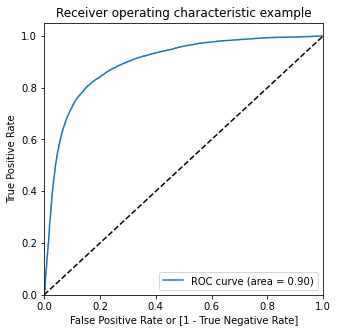

In [234]:
draw_roc(y_train_pred_1['Actual_Converted'], y_train_pred_1['Model_Converted_prob'])


### Optimal Cutoff selection

In [235]:
# different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_1[i]= y_train_pred_1['Model_Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_1.head()

,Actual_Converted,Model_Converted_prob,ID,Model_Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001885,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.760022,1,1,1,1,1,1,1,1,1,1,0,0
2,0,0.390906,2,0,1,1,1,1,0,0,0,0,0,0
3,0,0.170073,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.282054,4,0,1,1,1,0,0,0,0,0,0,0


In [236]:
# Accuracy sensitivity and specificity for different cutoffs.
cutoff = pd.DataFrame( columns = ['probability','accur','sensi','specf'])
num = [float(x)/10 for x in range(10)]
for i in num:
    confus_1 = metrics.confusion_matrix(y_train_pred_1['Actual_Converted'], y_train_pred_1[i] )
    total_1=sum(sum(confus_1))
    accur = (confus_1[0,0]+confus_1[1,1])/total_1
    
    specf = confus_1[0,0]/(confus_1[0,0]+confus_1[0,1])
    sensi = confus_1[1,1]/(confus_1[1,0]+confus_1[1,1])
    cutoff.loc[i] =[ i ,accur,sensi,specf]
print(cutoff)

     probability     accur     sensi     specf
0.0          0.0  0.500000  1.000000  0.000000
0.1          0.1  0.675816  0.979931  0.371702
0.2          0.2  0.740802  0.953172  0.528431
0.3          0.3  0.781895  0.922697  0.641094
0.4          0.4  0.808442  0.886276  0.730608
0.5          0.5  0.821396  0.838174  0.804619
0.6          0.6  0.822458  0.776321  0.868596
0.7          0.7  0.802522  0.688718  0.916326
0.8          0.8  0.748925  0.545208  0.952641
0.9          0.9  0.620919  0.260526  0.981311


<Figure size 7200x7200 with 0 Axes>

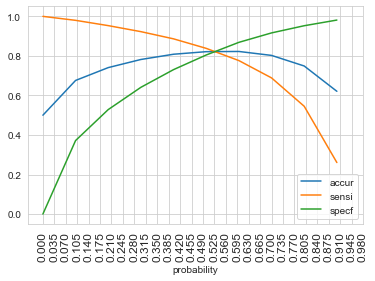

In [237]:
#Ploting the curves for accuracy sensitivity and specificity for various cutoffs
plt.figure(figsize=(100, 100))
sns.set_style("whitegrid")
cutoff.plot.line(x='probability', y=['accur','sensi','specf'])
plt.xticks(np.arange(0,1,step=0.035),size=12, rotation=90)
plt.show()

### From above we can see 0.525 is the optimal cutoff for our model

In [238]:
y_train_pred_1['Model_Converted'] = y_train_pred_1['Model_Converted_prob'].map( lambda x: 1 if x > 0.525 else 0)

y_train_pred_1.head()

,Actual_Converted,Model_Converted_prob,ID,Model_Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001885,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.760022,1,1,1,1,1,1,1,1,1,1,0,0
2,0,0.390906,2,0,1,1,1,1,0,0,0,0,0,0
3,0,0.170073,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.282054,4,0,1,1,1,0,0,0,0,0,0,0


In [239]:
y_train_pred_2 = y_train_pred_1.drop([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],1)
y_train_pred_2

,Actual_Converted,Model_Converted_prob,ID,Model_Converted
0,0,0.001885,0,0
1,0,0.760022,1,1
2,0,0.390906,2,0
3,0,0.170073,3,0
4,0,0.282054,4,0
...,...,...,...,...
37665,1,0.848740,37665,1
37666,1,0.938662,37666,1
37667,1,0.604065,37667,1
37668,1,0.895243,37668,1


### Model evaluation with new cutoff

In [240]:
# Confusion Matrix
confu_final = metrics.confusion_matrix(y_train_pred_2['Actual_Converted'], y_train_pred_2['Model_Converted'] )
print(confu_final)

[[15494  3341]
 [ 3287 15548]]


In [241]:
TP = confu_final[1,1] # true positive 
TN = confu_final[0,0] # true negatives
FP = confu_final[0,1] # false positives
FN = confu_final[1,0] # false negatives
print(TP, TN, FP, FN)

15548 15494 3341 3287


In [242]:
# sensitivity/Recall
TP / float(TP+FN)

0.8254844704008495

In [243]:
# false postive rate/Precision
TP / float(TP+FP)

0.8231245698554714

In [244]:
# Negative predictive value
TN / float(TN+ FN)

0.8249826952771417

In [245]:
# Accuracy from formual 
(TP+TN)/(TP+TN+FP+FN)

0.8240509689408017

In [246]:
#Precision Value from sklearn
precision_score(y_train_pred_2['Actual_Converted'], y_train_pred_2['Model_Converted'])

0.8231245698554714

In [247]:
#Recall Value from sklearn
recall_score(y_train_pred_2['Actual_Converted'], y_train_pred_2['Model_Converted'])

0.8254844704008495

### As we have to find the optimal cut off which will give model churn output tag (predicted values) is good as actual churn, so overall we won't miss any churn probable customer
### It is basically trade off b/w recall & precision

In [248]:
P, R, Threshold = precision_recall_curve(y_train_pred_2['Actual_Converted'], y_train_pred_2['Model_Converted_prob'])

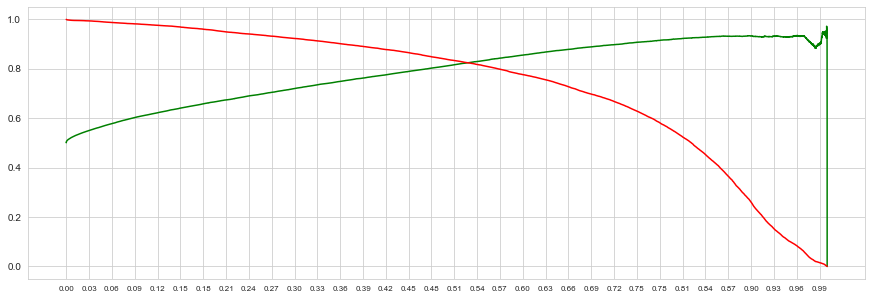

In [249]:
# Plotting Recall vs Precision curve
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
plt.plot(Threshold, P[:-1], "g-")
plt.plot(Threshold, R[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.03),size=8)


plt.show()

### So we can choose 0.52,0.53, let's check which is better

In [250]:
y_train_pred_2['Model_Converted'] = y_train_pred_2['Model_Converted_prob'].map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_2.head(20)

,Actual_Converted,Model_Converted_prob,ID,Model_Converted
0,0,0.001885,0,0
1,0,0.760022,1,1
2,0,0.390906,2,0
3,0,0.170073,3,0
4,0,0.282054,4,0
5,0,0.054892,5,0
6,0,0.169481,6,0
7,0,0.000191,7,0
8,0,0.045293,8,0
9,0,0.864730,9,1


In [251]:
# Classification Report
print(metrics.classification_report( y_train_pred_2['Actual_Converted'], y_train_pred_2['Model_Converted'] ))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     18835
           1       0.82      0.83      0.82     18835

    accuracy                           0.82     37670
   macro avg       0.82      0.82      0.82     37670
weighted avg       0.82      0.82      0.82     37670



In [252]:
y_train_pred_2['Model_Converted'] = y_train_pred_2['Model_Converted_prob'].map( lambda x: 1 if x > 0.53 else 0)

y_train_pred_2.head(20)

,Actual_Converted,Model_Converted_prob,ID,Model_Converted
0,0,0.001885,0,0
1,0,0.760022,1,1
2,0,0.390906,2,0
3,0,0.170073,3,0
4,0,0.282054,4,0
5,0,0.054892,5,0
6,0,0.169481,6,0
7,0,0.000191,7,0
8,0,0.045293,8,0
9,0,0.864730,9,1


In [253]:
# Classification Report
print(metrics.classification_report( y_train_pred_2['Actual_Converted'], y_train_pred_2['Model_Converted'] ))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82     18835
           1       0.83      0.82      0.82     18835

    accuracy                           0.82     37670
   macro avg       0.82      0.82      0.82     37670
weighted avg       0.82      0.82      0.82     37670



### so we will go with 0.525 cutoff

## Test set checking

In [254]:
X_test = X_test[Final_Columns]
X_test.head()

,onnet_mou_8,roam_og_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,av_rech_amt_data_8,vol_2g_mb_8,sachet_2g_8,sachet_3g_8,total_rech_data_amt_8,aon_month,roam_og_mou_av67,loc_og_t2t_mou_av67,std_og_t2t_mou_av67,std_og_t2m_mou_av67,loc_ic_t2t_mou_av67,loc_ic_t2m_mou_av67,loc_ic_t2f_mou_av67,std_ic_t2t_mou_av67,std_ic_t2f_mou_av67,isd_ic_mou_av67,ic_others_av67,total_rech_amt_av67,total_rech_data_av67,vol_2g_mb_av67,vol_3g_mb_av67,monthly_2g_av67,sachet_3g_av67
84453,-0.209322,-0.186959,-0.323878,-0.113831,0.418433,0.853239,0.111774,-0.213793,-0.006057,0.158824,-0.240554,-0.156608,-0.09918,-0.788951,0.933837,1.567800,0.295608,-0.346670,-0.422704,-0.182223,-0.169510,1.431467,-0.250507,0.196639,-0.444711,-0.392787,0.496856,0.459938,0.232839,-0.219928,0.388607,-0.152764,-0.098063,-0.529999,-0.286193,-0.421717,0.513012,-0.468563,-0.234047
28515,-0.428610,-0.148220,-0.123075,1.363587,-0.297038,0.872075,-0.348420,-0.214999,2.550925,-0.126079,-0.240554,-0.156608,-0.03173,0.618945,-0.559711,-0.439658,-0.039967,-0.218749,1.507225,-0.182223,0.053636,-0.162417,-0.250507,-0.086994,-0.438848,-0.128892,-0.225027,1.769839,-0.219641,-0.203667,1.222831,-0.152764,-0.098063,-0.314236,0.256611,-0.153933,-0.435473,-0.468563,-0.234047
64461,-0.498558,-0.087506,-0.313906,-0.292912,-0.314025,-0.161665,-0.276967,-0.214999,0.205080,-0.126079,-0.240554,-0.095873,-0.09918,-0.680651,0.511244,1.071039,1.485850,5.054532,-0.422704,-0.182223,0.187186,-0.050928,-0.201309,-0.347905,-0.444347,-0.334310,-0.338275,0.637484,-0.308532,-0.144094,-0.151767,-0.152764,-0.098063,0.198905,0.075677,5.803979,-0.435473,-0.468563,-0.234047
2074,-0.522993,-0.186959,-0.393637,-0.315990,-0.393988,-0.683842,-0.348420,-0.214999,-0.268538,-0.058515,-0.240554,-0.156608,-0.09918,-0.788951,-0.947570,-0.643806,-0.642953,-0.346670,-0.422704,-0.182223,-0.270377,-0.950068,-0.250507,-0.387420,-0.444711,-0.465221,-0.423249,-0.739518,-0.370698,-0.222515,-0.151767,-0.152764,-0.098063,-0.789852,-0.105258,-0.402686,0.269250,-0.468563,-0.234047
74969,-0.056003,-0.186959,1.907683,0.390642,-0.265076,-0.191026,-0.182998,-0.114626,-0.106312,-0.126079,-0.240554,-0.156608,-0.09918,0.185747,-0.195007,0.240836,-0.401759,-0.346639,0.349268,-0.182223,-0.218535,-0.556759,0.043579,-0.050146,-0.174798,0.725676,-0.230022,-0.420693,-0.301191,-0.176985,-0.140270,-0.152764,0.163364,0.007533,0.256611,-0.421717,-0.435473,-0.468563,-0.234047


In [255]:
X_test.shape

(8552, 39)

In [256]:
X_test_sm = sm.add_constant(X_test)

In [257]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:]

84453    0.018498
28515    0.108822
64461    0.118928
2074     0.754450
74969    0.124363
           ...   
57767    0.000128
58194    0.351026
63185    0.708505
93156    0.133191
18512    0.033481
Length: 8552, dtype: float64

In [258]:
# Taking out the predicted values from Y predict
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:]

array([0.01849773, 0.10882161, 0.11892788, ..., 0.70850535, 0.13319054,
       0.03348118])

In [259]:
# We will check predicted values with actual converted values
y_test_pred_1 = pd.DataFrame({'Actual_Converted':y_test.values, 'Model_Converted_prob':y_test_pred})
y_test_pred_1['ID'] = y_test.index
y_test_pred_1.head()

,Actual_Converted,Model_Converted_prob,ID
0,0,0.018498,84453
1,0,0.108822,28515
2,0,0.118928,64461
3,0,0.754450,2074
4,0,0.124363,74969


In [260]:
# Now we will impose condition for prediction that if predicted value >0.39 then we will say converted
y_test_pred_1['Model_Converted'] = y_test_pred_1['Model_Converted_prob'].map(lambda x: 1 if x >= 0.525 else 0)

y_test_pred_1.head(10)

,Actual_Converted,Model_Converted_prob,ID,Model_Converted
0,0,0.018498,84453,0
1,0,0.108822,28515,0
2,0,0.118928,64461,0
3,0,0.754450,2074,1
4,0,0.124363,74969,0
5,0,0.044767,78716,0
6,0,0.713170,9678,1
7,0,0.029951,24989,0
8,0,0.000282,60681,0
9,0,0.146119,2944,0


In [261]:
# Now start evaluating over model
confu_test = metrics.confusion_matrix(y_test_pred_1['Actual_Converted'], y_test_pred_1['Model_Converted'] )
print(confu_test)

[[6611 1462]
 [ 112  367]]


In [262]:
TP = confu_test[1,1] # true positive 
TN = confu_test[0,0] # true negatives
FP = confu_test[0,1] # false positives
FN = confu_test[1,0] # false negatives
print(TP, TN, FP, FN)

367 6611 1462 112


In [263]:
print(metrics.classification_report( y_test_pred_1['Actual_Converted'], y_test_pred_1['Model_Converted'] ))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8073
           1       0.20      0.77      0.32       479

    accuracy                           0.82      8552
   macro avg       0.59      0.79      0.61      8552
weighted avg       0.94      0.82      0.86      8552



In [264]:
# ROC curve for test set
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                             drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

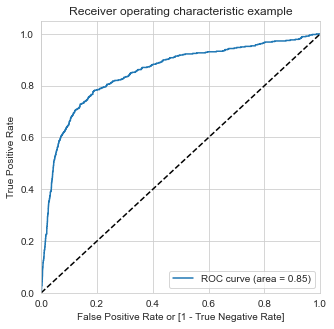

In [265]:
draw_roc(y_test_pred_1['Actual_Converted'], y_test_pred_1['Model_Converted_prob'])

In [266]:
confu_test = metrics.confusion_matrix(y_test_pred_1['Actual_Converted'], y_test_pred_1['Model_Converted'] )
print(confu_test)
TP3 = confu_test[1,1] # true positive 
TN3 = confu_test[0,0] # true negatives
FP3 = confu_test[0,1] # false positives
FN3 = confu_test[1,0] # false negatives

# sensitivity of the logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# specificity of the logistic regression model
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

[[6611 1462]
 [ 112  367]]
Sensitivity =  0.7661795407098121
Specificity =  0.8189025145546884
False Positive Rate =  0.18109748544531154
Precision =  0.20065609622744668
True Negative Prediction Rate =  0.9833407704893649


## 2. Decision Trees

In [267]:
# X & Y divide
y = churn_data_HV["Churn"]
X = churn_data_HV.drop(["Churn"],axis=1)

In [268]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)

In [269]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19952, 80)
(19952,)
(8552, 80)
(8552,)


### Imbalance classs overcome

In [270]:
# Random Undersampling
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

2234

In [271]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 1117), (1, 1117)]


In [272]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [273]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.7519878391019644
F1 score:  0.254481546572935
Recall:  0.755741127348643
Precision:  0.1530008453085376

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      8073
           1       0.15      0.76      0.25       479

    accuracy                           0.75      8552
   macro avg       0.57      0.75      0.55      8552
weighted avg       0.93      0.75      0.82      8552


 confussion matrix:
 [[6069 2004]
 [ 117  362]]


In [274]:
# Decision Trees - Tomek Links
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)
from sklearn.tree import DecisionTreeClassifier
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [275]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))

Accuracy:  0.9193171188026192
F1 score:  0.32617187500000006
Recall:  0.348643006263048
Precision:  0.30642201834862387

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      8073
           1       0.31      0.35      0.33       479

    accuracy                           0.92      8552
   macro avg       0.63      0.65      0.64      8552
weighted avg       0.92      0.92      0.92      8552


 confussion matrix:
 [[7695  378]
 [ 312  167]]


In [276]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [277]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.8033208606173995
F1 score:  0.03885714285714286
Recall:  0.0709812108559499
Precision:  0.02675059008654603

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      8073
           1       0.03      0.07      0.04       479

    accuracy                           0.80      8552
   macro avg       0.48      0.46      0.46      8552
weighted avg       0.89      0.80      0.84      8552


 confussion matrix:
 [[6836 1237]
 [ 445   34]]


In [278]:
# Decision Trees - SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [279]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.8865762394761459
F1 score:  0.3188202247191011
Recall:  0.47390396659707723
Precision:  0.2402116402116402

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      8073
           1       0.24      0.47      0.32       479

    accuracy                           0.89      8552
   macro avg       0.60      0.69      0.63      8552
weighted avg       0.93      0.89      0.90      8552


 confussion matrix:
 [[7355  718]
 [ 252  227]]


In [280]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [281]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.728601496725912
F1 score:  0.09229565897536175
Recall:  0.24634655532359082
Precision:  0.05678537054860443

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      8073
           1       0.06      0.25      0.09       479

    accuracy                           0.73      8552
   macro avg       0.50      0.50      0.47      8552
weighted avg       0.89      0.73      0.80      8552


 confussion matrix:
 [[6113 1960]
 [ 361  118]]


In [282]:
# Decision Trees - SMOTE+TOMEK
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [283]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  0.8189897100093545
F1 score:  0.22444889779559118
Recall:  0.46764091858037576
Precision:  0.14765985497692816

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      8073
           1       0.15      0.47      0.22       479

    accuracy                           0.82      8552
   macro avg       0.56      0.65      0.56      8552
weighted avg       0.92      0.82      0.86      8552


 confussion matrix:
 [[6780 1293]
 [ 255  224]]


### we will use SMOTE only

In [284]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [285]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [286]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_resampled_smt.columns, 
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [287]:
def evaluate_model_01(dt_classifier):
    confu_test = confusion_matrix(y_test, dt_classifier.predict(X_test))
    print(confu_test)
    TP3 = confu_test[1,1] # true positive 
    TN3 = confu_test[0,0] # true negatives
    FP3 = confu_test[0,1] # false positives
    FN3 = confu_test[1,0] # false negatives

    # sensitivity of the logistic regression model
    print("Sensitivity = ",TP3 / float(TP3+FN3))

    # specificity of the logistic regression model
    print("Specificity = ",TN3 / float(TN3+FP3))

    # Calculate false postive rate - predicting churn when customer does not have churned
    print("False Positive Rate = ",FP3/ float(TN3+FP3))

    # positive predictive value 
    print ("Precision = ",TP3 / float(TP3+FP3))

    # negative predictive value
    print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))
    


In [288]:
def evaluate_model(dt_classifier,X_resampled_smt, y_resampled_smt ):
    print("Train Accuracy :", accuracy_score(y_resampled_smt, dt_classifier.predict(X_resampled_smt)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_resampled_smt, dt_classifier.predict(X_resampled_smt)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    

In [289]:
def report(model):
    from sklearn.metrics import classification_report
    print(classification_report(y_test, model.predict(X_test)))

### Base Model

In [290]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(random_state=42)

In [291]:
evaluate_model_01(dt_default)

[[7359  714]
 [ 253  226]]
Sensitivity =  0.4718162839248434
Specificity =  0.9115570419918246
False Positive Rate =  0.08844295800817539
Precision =  0.2404255319148936
True Negative Prediction Rate =  0.9667630057803468


In [292]:
report(dt_default)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8073
           1       0.24      0.47      0.32       479

    accuracy                           0.89      8552
   macro avg       0.60      0.69      0.63      8552
weighted avg       0.93      0.89      0.90      8552



In [293]:
def AUC (dt_default):
    print("AUC:    \t", round(roc_auc_score(y_test, dt_default.predict(X_test),2)))

### Now we will tune the tree thru gridsearch

In [294]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [295]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_leaf': [20, 50, 100],
    'criterion': ["gini"]
}

In [296]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [297]:
%%time
grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   45.0s finished


Wall time: 51.6 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [20, 50, 100]},
             scoring='accuracy', verbose=1)

In [298]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,3.481880,0.083642,0.025700,0.001044,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.891060,0.911977,0.913454,0.906021,0.905628,0.008859,5
1,3.284615,0.063110,0.025759,0.001478,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.882990,0.903695,0.904110,0.897632,0.897107,0.008544,6
2,3.677843,0.024442,0.023479,0.000985,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.871098,0.896687,0.894234,0.885420,0.886860,0.010018,11
3,5.832214,0.187637,0.023228,0.001287,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.887874,0.912402,0.916109,0.908463,0.906212,0.010927,1
4,5.108460,0.187538,0.025393,0.001010,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.882247,0.904544,0.903472,0.898057,0.897080,0.008910,7


In [299]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,5.832214,0.187637,0.023228,0.001287,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.887874,0.912402,0.916109,0.908463,0.906212,0.010927,1
6,6.273907,0.321227,0.024784,0.000879,gini,30,20,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.888087,0.912296,0.916003,0.908463,0.906212,0.010799,2
9,6.268605,0.370105,0.025829,0.001471,gini,40,20,"{'criterion': 'gini', 'max_depth': 40, 'min_sa...",0.888087,0.912296,0.916003,0.908251,0.906159,0.010788,3
12,6.254559,0.417268,0.028242,0.009190,gini,50,20,"{'criterion': 'gini', 'max_depth': 50, 'min_sa...",0.888087,0.912296,0.916003,0.908251,0.906159,0.010788,3
0,3.481880,0.083642,0.025700,0.001044,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.891060,0.911977,0.913454,0.906021,0.905628,0.008859,5


In [300]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=42)

In [301]:
dt_best = grid_search.best_estimator_

In [302]:
evaluate_model_01(dt_best)

[[7304  769]
 [ 211  268]]
Sensitivity =  0.5594989561586639
Specificity =  0.9047442090920352
False Positive Rate =  0.09525579090796482
Precision =  0.25843780135004824
True Negative Prediction Rate =  0.9719228210246175


In [303]:
evaluate_model(dt_best,X_resampled_smt, y_resampled_smt )

Train Accuracy : 0.9380408813379347
Train Confusion Matrix:
[[17634  1201]
 [ 1133 17702]]
--------------------------------------------------
Test Accuracy : 0.8854069223573433
Test Confusion Matrix:
[[7304  769]
 [ 211  268]]


In [304]:
report(dt_best)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      8073
           1       0.26      0.56      0.35       479

    accuracy                           0.89      8552
   macro avg       0.62      0.73      0.65      8552
weighted avg       0.93      0.89      0.90      8552



In [305]:
# checking with lesser min sample leaf & depth
dt_02 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=42, criterion="gini")
dt_02.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [306]:
evaluate_model(dt_02,X_resampled_smt, y_resampled_smt )

Train Accuracy : 0.6756835678258561
Train Confusion Matrix:
[[18599   236]
 [11981  6854]]
--------------------------------------------------
Test Accuracy : 0.9394293732460243
Test Confusion Matrix:
[[7878  195]
 [ 323  156]]


In [307]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_02.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8073
           1       0.44      0.33      0.38       479

    accuracy                           0.94      8552
   macro avg       0.70      0.65      0.67      8552
weighted avg       0.93      0.94      0.93      8552



In [308]:
evaluate_model_01(dt_02)

[[7878  195]
 [ 323  156]]
Sensitivity =  0.325678496868476
Specificity =  0.9758454106280193
False Positive Rate =  0.024154589371980676
Precision =  0.4444444444444444
True Negative Prediction Rate =  0.9606145592000975


In [309]:
gph = get_dt_graph(dt_02)
Image(gph.create_png())

InvocationException: GraphViz's executables not found

In [310]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

InvocationException: GraphViz's executables not found

### accuracies are almost same, so we can go with lesser parameters

## 3. Random Forest

In [311]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
# making random model
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
rf.fit(X_resampled_smt, y_resampled_smt)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [313]:
evaluate_model(rf, X_resampled_smt, y_resampled_smt)

Train Accuracy : 0.8639500929121317
Train Confusion Matrix:
[[16474  2361]
 [ 2764 16071]]
--------------------------------------------------
Test Accuracy : 0.8608512628624883
Test Confusion Matrix:
[[7027 1046]
 [ 144  335]]


In [314]:
evaluate_model_01(rf)

[[7027 1046]
 [ 144  335]]
Sensitivity =  0.6993736951983298
Specificity =  0.8704323052149139
False Positive Rate =  0.1295676947850861
Precision =  0.24257784214337436
True Negative Prediction Rate =  0.9799191186724306


In [315]:
report(rf)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8073
           1       0.24      0.70      0.36       479

    accuracy                           0.86      8552
   macro avg       0.61      0.78      0.64      8552
weighted avg       0.94      0.86      0.89      8552



### Grid search for hyper-parameter tuning

In [316]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [317]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5,7],
    'min_samples_leaf': [500],
    'max_features': [40,50],
    'n_estimators': [50]
}

In [318]:
#Instantiate the grid search model
from sklearn.model_selection import RandomizedSearchCV
Random_search = RandomizedSearchCV(estimator=classifier_rf, param_distributions=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring ='roc_auc',n_iter=1 )

In [319]:
%%time
Random_search.fit(X_resampled_smt,y_resampled_smt)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   18.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   18.3s finished


Wall time: 24.4 s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'max_depth': [5, 7],
                                        'max_features': [40, 50],
                                        'min_samples_leaf': [500],
                                        'n_estimators': [50]},
                   scoring='roc_auc', verbose=1)

In [320]:
score_df = pd.DataFrame(Random_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,17.613403,0.336326,0.291269,0.131544,50,500,40,5,"{'n_estimators': 50, 'min_samples_leaf': 500, ...",0.932144,0.945047,0.944034,0.940133,0.940339,0.005075,1


In [321]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,17.613403,0.336326,0.291269,0.131544,50,500,40,5,"{'n_estimators': 50, 'min_samples_leaf': 500, ...",0.932144,0.945047,0.944034,0.940133,0.940339,0.005075,1


In [323]:
Random_search.best_score_

0.940339333839249

In [324]:
# extracting best estimator
rf_best = Random_search.best_estimator_

In [325]:
rf_best

RandomForestClassifier(max_depth=5, max_features=40, min_samples_leaf=500,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [326]:
evaluate_model(rf_best, X_resampled_smt, y_resampled_smt)

Train Accuracy : 0.8780727369259358
Train Confusion Matrix:
[[16479  2356]
 [ 2237 16598]]
--------------------------------------------------
Test Accuracy : 0.8619036482694107
Test Confusion Matrix:
[[7034 1039]
 [ 142  337]]


In [327]:
from sklearn.metrics import classification_report

In [328]:
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8073
           1       0.24      0.70      0.36       479

    accuracy                           0.86      8552
   macro avg       0.61      0.79      0.64      8552
weighted avg       0.94      0.86      0.89      8552



In [329]:
evaluate_model_01(rf_best)

[[7034 1039]
 [ 142  337]]
Sensitivity =  0.7035490605427975
Specificity =  0.8712993930385234
False Positive Rate =  0.12870060696147653
Precision =  0.2449127906976744
True Negative Prediction Rate =  0.9802118171683389


### accuracies has improved with random forest, further checking taking time thru random forest (system constraint)

## PCA application 

### Checking components to define variance of data

In [330]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion

In [331]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [332]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_resampled_smt)

In [333]:
 #extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      10.94
1      20.25
2      26.33
3      31.07
4      35.16
5      38.96
6      42.50
7      45.49
8      48.36
9      51.12
10     53.65
11     56.08
12     58.47
13     60.65
14     62.71
15     64.67
16     66.56
17     68.33
18     69.99
19     71.62
20     73.17
21     74.68
22     76.14
23     77.53
24     78.80
25     79.91
26     80.99
27     81.98
28     82.97
29     83.86
30     84.74
31     85.61
32     86.44
33     87.24
34     88.02
35     88.78
36     89.50
37     90.20
38     90.86
39     91.47
40     92.04
41     92.54
42     93.02
43     93.46
44     93.89
45     94.30
46     94.72
47     95.11
48     95.47
49     95.82
50     96.16
51     96.48
52     96.79
53     97.09
54     97.38
55     97.66
56     97.93
57     98.19
58     98.41
59     98.62
60     98.82
61     99.01
62     99.18
63     99.34
64     99.47
65     99.59
66     99.70
67     99.80
68     99.88
69     99.92
70     99.95
71     99.97
72     99.99
73    100.00
74    100.00
75    100.00
76    100.00

#### 39 components showing 90% vairance

## Logistic Regression with PCA

In [334]:
# create pipeline
PCA_VAR = 39
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VAR)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [335]:
# fit model
pipeline.fit(X_resampled_smt, y_resampled_smt)

# check score on train data
pipeline.score(X_resampled_smt, y_resampled_smt)

0.8121051234404035

In [336]:
evaluate_model_01(pipeline)

[[6424 1649]
 [ 107  372]]
Sensitivity =  0.7766179540709812
Specificity =  0.7957388826954044
False Positive Rate =  0.20426111730459556
Precision =  0.18406729341909944
True Negative Prediction Rate =  0.9836165977645077


In [337]:
evaluate_model(pipeline,X_resampled_smt,y_resampled_smt)

Train Accuracy : 0.8121051234404035
Train Confusion Matrix:
[[15053  3782]
 [ 3296 15539]]
--------------------------------------------------
Test Accuracy : 0.7946679139382601
Test Confusion Matrix:
[[6424 1649]
 [ 107  372]]


In [338]:
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

ROC:    	 0.85


#### Area under curve is now 85%

### Now we will deal with Imbalance data thru PCA only (no SMOTE)

In [339]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

In [340]:
y_train.value_counts(normalize=True)

0    0.944016
1    0.055984
Name: Churn, dtype: float64

In [341]:
weights = {0:0.06, 1:0.94}
logistic = LogisticRegression(class_weight=weights)

In [342]:
# create pipeline
para = [("scaler", MinMaxScaler()), ("pca", pca), ("logistic", logistic)]

In [343]:
pca_logistic = Pipeline(para)

In [344]:
# Parameter for logistic regression
params = {'pca__n_components': [20, 30, 40, 60], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20,100,1000], 'logistic__penalty': ['l1', 'l2']}

In [345]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 2)

In [346]:
# create gridsearch object
Log_model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [347]:
Log_model.fit(X_train, y_train)

Fitting 4 folds for each of 88 candidates, totalling 352 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 352 out of 352 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.06,
                                                                         1: 0.94}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 100,
                                         1000],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [20, 30, 40, 60]},
             scoring='roc_auc', verbose=1)

In [348]:
evaluate_model(Log_model, X_train,y_train)

Train Accuracy : 0.8115978348035284
Train Confusion Matrix:
[[15294  3541]
 [  218   899]]
--------------------------------------------------
Test Accuracy : 0.8047240411599625
Test Confusion Matrix:
[[6511 1562]
 [ 108  371]]


In [349]:
evaluate_model_01(Log_model)

[[6511 1562]
 [ 108  371]]
Sensitivity =  0.7745302713987474
Specificity =  0.8065155456459804
False Positive Rate =  0.19348445435401956
Precision =  0.19192964304190377
True Negative Prediction Rate =  0.983683335851337


In [350]:
print("AUC: ", Log_model.best_score_)
print("hyperparameters: ", Log_model.best_params_)

AUC:  0.8674549747179855
hyperparameters:  {'logistic__C': 100, 'logistic__penalty': 'l2', 'pca__n_components': 60}


#### AUC around 87%

### Random forest with PCA

In [351]:
rf = RandomForestClassifier(class_weight={0:0.09, 1: 0.91}, n_jobs = -1)
params = {"criterion": ['gini'], "max_features": ['auto'],  'min_samples_leaf': [500,1000], 'n_estimators': [100,200],'max_depth': [10,20] }
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 2)
model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [352]:
model.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   23.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=2, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.09, 1: 0.91},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20],
                         'max_features': ['auto'],
                         'min_samples_leaf': [500, 1000],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [353]:
evaluate_model_01(model)

[[7373  700]
 [ 163  316]]
Sensitivity =  0.6597077244258872
Specificity =  0.9132912176390438
False Positive Rate =  0.08670878236095628
Precision =  0.3110236220472441
True Negative Prediction Rate =  0.9783704883227177


In [354]:
evaluate_model(model,X_resampled_smt,y_resampled_smt)

Train Accuracy : 0.7946110963631537
Train Confusion Matrix:
[[17323  1512]
 [ 6225 12610]]
--------------------------------------------------
Test Accuracy : 0.899087932647334
Test Confusion Matrix:
[[7373  700]
 [ 163  316]]


In [355]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8861646210783259
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 500, 'n_estimators': 200}


### AUC around 90%

In [356]:
model.best_estimator_

RandomForestClassifier(class_weight={0: 0.09, 1: 0.91}, max_depth=10,
                       min_samples_leaf=500, n_estimators=200, n_jobs=-1)

## Best Models

In [357]:
# Logistic regression with PCA
Model_Final_01=Log_model.best_estimator_

In [358]:
# manual tunes logistic regression
Model_Final_02=log_final

In [359]:
# random forest tunes thru random grid search
Model_Final_03=rf_best

In [360]:
evaluate_model_01(Model_Final_01)

[[6511 1562]
 [ 108  371]]
Sensitivity =  0.7745302713987474
Specificity =  0.8065155456459804
False Positive Rate =  0.19348445435401956
Precision =  0.19192964304190377
True Negative Prediction Rate =  0.983683335851337


In [361]:
confu_test = metrics.confusion_matrix(y_test_pred_1['Actual_Converted'], y_test_pred_1['Model_Converted'] )
print(confu_test)
TP3 = confu_test[1,1] # true positive 
TN3 = confu_test[0,0] # true negatives
FP3 = confu_test[0,1] # false positives
FN3 = confu_test[1,0] # false negatives

# sensitivity of the logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# specificity of the logistic regression model
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

[[6611 1462]
 [ 112  367]]
Sensitivity =  0.7661795407098121
Specificity =  0.8189025145546884
False Positive Rate =  0.18109748544531154
Precision =  0.20065609622744668
True Negative Prediction Rate =  0.9833407704893649


In [362]:
evaluate_model_01(Model_Final_03)

[[7034 1039]
 [ 142  337]]
Sensitivity =  0.7035490605427975
Specificity =  0.8712993930385234
False Positive Rate =  0.12870060696147653
Precision =  0.2449127906976744
True Negative Prediction Rate =  0.9802118171683389


## out of these 3 models, we will go with 1st model i.e. PCA + Logistic regression as it is giving good balance between sensitivity & specificity

In [363]:
features = X_train.columns
importance = Model_Final_03.feature_importances_
feature_imp = pd.DataFrame({'variables': features, 'importance_%': importance*100})
feature_imp = feature_imp[['variables', 'importance_%']]
feature_imp = feature_imp.sort_values('importance_%', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp['importance_%'].sum())
feature_imp

Sum of importance= 100.0


,variables,importance_%
0,roam_og_mou_8,34.994141
1,roam_ic_mou_8,24.101694
2,Act_total_rech_amt_8,12.261143
3,last_day_rch_amt_8,4.427105
4,total_rech_amt_8,4.153817
5,loc_ic_t2m_mou_8,4.077148
6,total_rech_data_8,2.801068
7,av_rech_amt_data_8,2.782928
8,arpu_8,1.483523
9,max_rech_amt_8,1.282146


In [364]:
top_20_features = feature_imp.variables[0:20]
top_20_features

0             roam_og_mou_8
1             roam_ic_mou_8
2      Act_total_rech_amt_8
3        last_day_rch_amt_8
4          total_rech_amt_8
5          loc_ic_t2m_mou_8
6         total_rech_data_8
7        av_rech_amt_data_8
8                    arpu_8
9            max_rech_amt_8
10    total_rech_data_amt_8
11      loc_og_t2c_mou_av67
12         loc_og_t2m_mou_8
13          spl_ic_mou_av67
14         roam_ic_mou_av67
15         loc_og_t2t_mou_8
16           sachet_3g_av67
17              vol_3g_mb_8
18         roam_og_mou_av67
19          spl_og_mou_av67
Name: variables, dtype: object

In [365]:
X_train_sm = sm.add_constant(X_resampled_smt[cols])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37670
Model:                            GLM   Df Residuals:                    37630
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16013.
Date:                Mon, 16 Aug 2021   Deviance:                       32025.
Time:                        21:43:52   Pearson chi2:                 1.29e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9800      0.040     24.243      0.000       0.901       1.059
onnet_mou_8              -0.0011   6.31e-05    -18.178      0.000      -0.001      -0.001
roam_og_mou_8             0.0017      0.000     10.451      0.000       0.001       0.002
std_og_t2m_mou_8         -0.0011    6.8e-05    -16.480      0.000      -0.001      -0.001
spl_og_mou_8             -0.0024      0.001     -2.579      0.010      -0.004      -0.001
loc_ic_t2t_mou_8         -0.0043      0.000    -10.789      0.000      -0.005      -0.003
loc_ic_t2m_mou_8         -0.0079      0.000    -29.238      0.000      -0.008      -0.007
loc_ic_t2f_mou_8         -0.0195      0.002    -12.178      0.000      -0.023      -0.016
std_ic_t2t_mou_8         -0.0078      0.001    -10.325      0.000      -0.009      -0.006
std_ic_t2m_mou_8         -0.0006      0.000     -2.657      0.008      -0.001      -0.000
std_ic_t2f_mou_8         -0.0241      0.003     -7.166      0.000      -0.031      -0.017
spl_ic_mou_8             -1.7879      0.180     -9.930      0.000      -2.141      -1.435
isd_ic_mou_8             -0.0023      0.001     -4.553      0.000      -0.003      -0.001
ic_others_8               0.0153      0.003      5.548      0.000       0.010       0.021
total_rech_num_8         -0.0253      0.002    -10.569      0.000      -0.030      -0.021
max_rech_amt_8            0.0012      0.000      8.865      0.000       0.001       0.001
last_day_rch_amt_8       -0.0039      0.000    -22.559      0.000      -0.004      -0.004
av_rech_amt_data_8       -0.0053      0.000    -28.336      0.000      -0.006      -0.005
vol_2g_mb_8              -0.0008   9.41e-05     -8.327      0.000      -0.001      -0.001
sachet_2g_8              -0.3253      0.014    -22.675      0.000      -0.353      -0.297
sachet_3g_8              -0.7980      0.052    -15.273      0.000      -0.900      -0.696
total_rech_data_amt_8     0.0005   2.65e-05     17.505      0.000       0.000       0.001
aon_month                -0.0084      0.001    -15.293      0.000      -0.009      -0.007
roam_og_mou_av67          0.0023      0.000     11.751      0.000       0.002       0.003
loc_og_t2t_mou_av67       0.0006    9.4e-05      6.253      0.000       0.000       0.001
std_og_t2t_mou_av67       0.0010   5.72e-05     17.676      0.000       0.001       0.001
std_og_t2m_mou_av67       0.0010    5.6e-05     17.021      0.000       0.001       0.001
loc_ic_t2t_mou_av67       0.0017      0.000      5.803      0.000       0.001       0.002
loc_ic_t2m_mou_av67       0.0039      0.000     20.193      0.000       0.004       0.004
loc_ic_t2f_mou_av67       0.0054      0.001      5.680      0.000       0.004       0.007
std_ic_t2t_mou_av67       0.0038      0.000      8.591      0.000       0.003       0.005
std_ic_t2f_mou_av67    

In [366]:
Positive_coeff =['sachet_3g_av67',
'total_rech_data_av67',
'ic_others_8',
'std_ic_t2f_mou_av67',
'loc_ic_t2f_mou_av67',
'loc_ic_t2m_mou_av67',
'std_ic_t2t_mou_av67',
'roam_og_mou_av67'
]
Negative_coeff =['spl_ic_mou_8',
'sachet_3g_8',
'monthly_2g_av67',
'sachet_2g_8',
'total_rech_num_8',
'std_ic_t2f_mou_8',
'loc_ic_t2f_mou_8',
'ic_others_av67'
]


### Recommendations

#### - Roaming outgoing related offers required as outgoing minutes increasing so churn possibility increasing, may be company doesn't have good roaming plans. The telecom provider could offer better deals to its customers.

#### - Sachet (small schemes <1 month) for 3g is not very good. Therefore, the company need to review their existing schemes.

#### - As the total recharge data amount increases, the customer churn possibility also increases. So data related rates needs to be cut down or more offers need to provided.

#### - Special incoming call customers are more reliable.

#### - More focus needs to be provided for max recharge customers by giving them better offers. 

#### - The telecom provider could target high churn customers by providing them with lock-in offers which will help to reduce their churn. 


